# Table of Contents
1. [The Struggling Bike Company: Analyzing the Viability of Selling Bicycles](#section1)
   1. [About the data](#section1-1)
   2. [Project Goal](#section1-2)
2. [Data Exploration](#section2)
   1. [Dataset Introduction](#section2-1)
   2. [Data Cleaning](#section2-2)
      1. [Removing unnecessary columns](#section2-2-1)
      2. [Dropping missing values](#section2-2-2)
   3. [Data Optimization](#section2-3)
      1. [Optimize datatypes](#section2-3-1)
3. [Exploratory Data Analysis (EDA)](#section3)
   1. [Business Profitability Analysis](#section3-1)
      1. [Negative Margin Discovery](#section3-1-1)
      2. [Margins Over Time](#section3-1-2)
         1. [Monthly Resampling](#section3-1-2-1)
4. [The Four Phases](#section4)
   1. [Phase 1: Negative Margins](#section4-1)
      1. [Substantially Higher Margins in Germany](#section4-1-1)
   2. [Phase 2: The New Product Line](#section4-2)
      1. [The most profitable products](#section4-2-1)
      2. [Revenue and Margin Trends After New Product Introductions](#section4-2-2)
      3. [Decline in Bike Sales, Growth in Accessories and Clothing](#section4-2-3)
      4. [Correlation between Margin and Unit Price](#section4-2-4)
   3. [Phase 3: The Comeback](#section4-3)
      1. [Analyzing the US Market](#section4-3-1)
         1. [US Bike Margin Decline: March 2015 to January 2016](#section4-3-1-1)
         2. [US Bike Margin Rebound: Significant Impact in January 2016](#section4-3-1-2)
         3. [Variability Across States: Certain States Outperforming Others](#section4-3-1-3)
         4. [US Success: Mastery of Upselling Techniques](#section4-3-1-4)
5. [Insights #1: The Four Phases (full version)](#section5)
6. [Germany's Path to Profitability in Bike Sales](#section6)
   1. [Slightly Increased Unit Cost](#section6-1)
   2. [Consistent Order Volume Across Countries](#section6-2)
   3. [Prices 33% Higher!](#section6-3)
      1. [Top-Performing German States](#section6-3-1)
7. [Correlation Matrix Analysis](#section7)
8. [Insights #2: How Germany Achieved Profits in Bike Sales](#section8)
9. [Factors Behind Germany's Success](#section9)
   1. [Finding the Ideal Target Audience](#section9-1)
      1. [Age distribution](#section9-1-1)
      2. [Gender distribution](#section9-1-2)
      3. [Bike type preferences](#section9-1-3)
      4. [Struggles During Off-Season](#section9-1-4)
10. [Final Insights: Factors behind Germanys Success](#section10)
11. [Conclusion](#section11)

<img align="left" src="https://iili.io/HXJBlj9.jpg" style="height:90px" style="width:30px"/>
<br>

<a name="section1"></a>
# The Struggling Bike Company: Analyzing the Viability of Selling Bicycles
<table>
    <tr>
        <td>
            <img src="https://iili.io/HXPWyVj.md.png" alt="Your image description" />
        </td>
        <td>
            <strong>Dataset Attribution and License:</strong><br>
            The dataset used in this research was obtained from <a href="https://data.world/vineet/salesdata">data.world</a>.<br>
            Licensed under <a href="https://creativecommons.org/licenses/by/4.0/">4.0 International (CC BY 4.0)</a>. All rights reserved.
        </td>
    </tr>
</table>


<a name="section1-1"></a>
## About the data
**Columns**: </br>

`Date`	Date of the sale. (Date)  
`Year`	Year of the sale. (Integer)  
`Month`	Month of the sale. (Integer)  
`Customer Age`	Age of the customer. (Integer)  
`Customer Gender`	Gender of the customer. (String)  
`Country`	Country of the customer. (String)  
`State`	State of the customer. (String)  
`Product Category`	Category of the product. (String)  
`Sub Category`	Sub-category of the product. (String)  
`Quantity`	Quantity of the product sold/purchased. (Integer)  
`Unit Cost`	Cost of the product per unit. (Float)  
`Unit Price`	Price of the product per unit. (Float)  
`Revenue`	Total revenue generated from the sale. (Float)  
`Column1`	Unknown. (Unknown)   
  
<a href="https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa">Source Link</a>

<a name="section1-2"></a>
## Project Goal
- Investigate the bicycle retail business within the European market to identify opportunities for enhancing growth over the next 12 months.
- Examine top-performing entities in the industry, focusing on factors driving their success, and create a benchmark for the company to increase the market shares.
- Apply insights gained from the analysis to develop strategies that minimize risk while increasing profits by 30%, ensuring the involvement of key stakeholders and addressing potential challenges.

<br>
<hr style="border:1px solid brown"> </hr>

<a name="section2"></a>
# Data Exploration

<a name="section2-1"></a>
## Dataset Introduction

In [1]:
# [RUN]
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set Style
sns.set(style="ticks", font="Calibri", font_scale=1.2, rc={"grid.linestyle": "-", "axes.grid": False})

In [2]:
# if read cleaned data i.e this cell: 
    # don't run data cleaning cells
df = pd.read_csv("SalesForCourse_quizz_table_clean.csv")

# Optimize object-datatypes to categorical
cat_columns = ['Month', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category']
for col in cat_columns:
    df[col] = df[col].astype('category')

# Optimize numerical datatypes
df['Date'] = pd.to_datetime(df['Date'])
# Convert Year to integer
df['Year'] = df['Year'].astype(int)
# Convert Customer Age to integer
df['Customer Age'] = df['Customer Age'].astype(int)
# Convert Quantity to integer
df['Quantity'] = df['Quantity'].astype(int)

# Margin per unit
df['Margin'] = df['Unit Price'] - df['Unit Cost']
# Total margin per sale
df['Total Margin'] = df['Margin'] * df['Quantity']

# Groupby object for Margin
margin = df.groupby('Date')['Margin'].sum()

In [69]:
# elif read uncleaned data i.e this cell:
    # run data cleaning cells
# os.listdir()
# df = pd.read_csv("SalesForCourse_quizz_table.csv")
# df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [35]:
df.describe(include=object)

,Date,Month,Customer Gender,Country,State,Product Category,Sub Category
count,34866,34866,34866,34866,34866,34866,34866
unique,576,12,2,4,45,3,17
top,03/01/16,June,M,United States,California,Accessories,Tires and Tubes
freq,196,3680,17805,18076,10332,22534,11112


In [36]:
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [37]:
df.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [70]:
print("Column1")
df.loc[df["Column1"].notna(), "Column1"].sort_values(ascending=False)

Column1


379     3681.0
2555    3495.0
2468    3459.0
1340    3419.0
1483    3382.0
         ...  
688        3.0
2014       3.0
2692       2.0
2576       2.0
1436       2.0
Name: Column1, Length: 2574, dtype: float64

In [71]:
# Get categorical columns, unique values and unique value with lowest count
print("Categorical Columns\n")
object_cols = df.select_dtypes("object").drop(columns=["Date"])
for i in object_cols:
    value_counts = df[i].value_counts()
    lowest_count = value_counts.min()
    lowest_count_vals = value_counts[value_counts == lowest_count].index.tolist()
    print(f"{i}")
    print(df[i].unique())
    print(f"Value lowest count ({lowest_count}): {lowest_count_vals}")
    print("")

Categorical Columns

Month
['February' 'March' 'April' 'June' 'July' 'August' 'September' 'October'
 'November' 'December' 'May' 'January' nan]
Value lowest count (2215): ['July']

Customer Gender
['F' 'M' nan]
Value lowest count (17061): ['F']

Country
['United States' 'France' 'United Kingdom' 'Germany' nan]
Value lowest count (5168): ['France']

State
['Washington' 'California' 'Oregon' 'Essonne' 'Yveline' 'England' 'Hessen'
 'Hamburg' 'Seine Saint Denis' 'Saarland' 'Nordrhein-Westfalen' 'Bayern'
 'Seine (Paris)' 'Pas de Calais' 'Moselle' 'Hauts de Seine' 'Nord'
 'Seine et Marne' 'Loiret' 'Charente-Maritime' 'Loir et Cher'
 'Brandenburg' 'Alabama' "Val d'Oise" 'Val de Marne' 'Minnesota' 'Wyoming'
 'Ohio' 'Garonne (Haute)' 'Kentucky' 'Texas' 'Missouri' 'Somme' 'New York'
 'Florida' 'Illinois' 'South Carolina' 'North Carolina' 'Georgia'
 'Virginia' 'Mississippi' 'Montana' 'Arizona' 'Massachusetts' 'Utah' nan]
Value lowest count (1): ['Missouri', 'Massachusetts']

Product Category
['Ac

Numerical Data



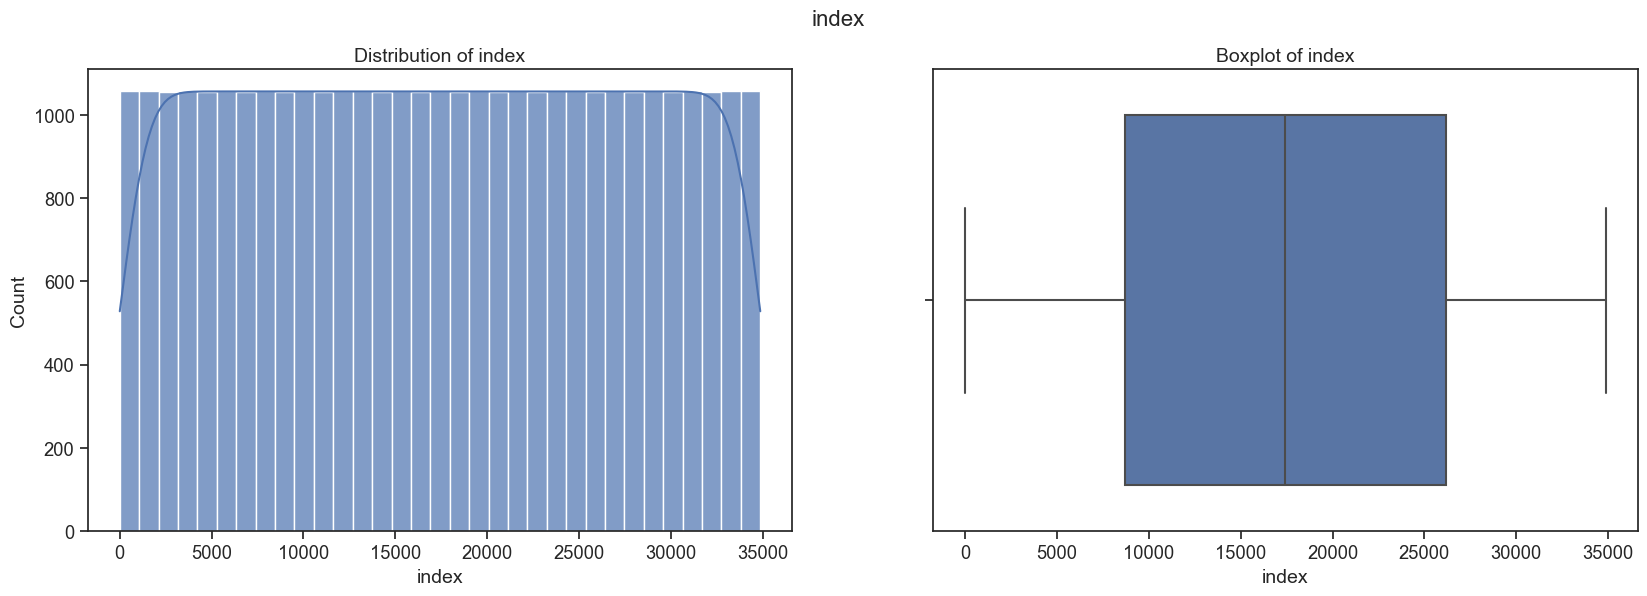

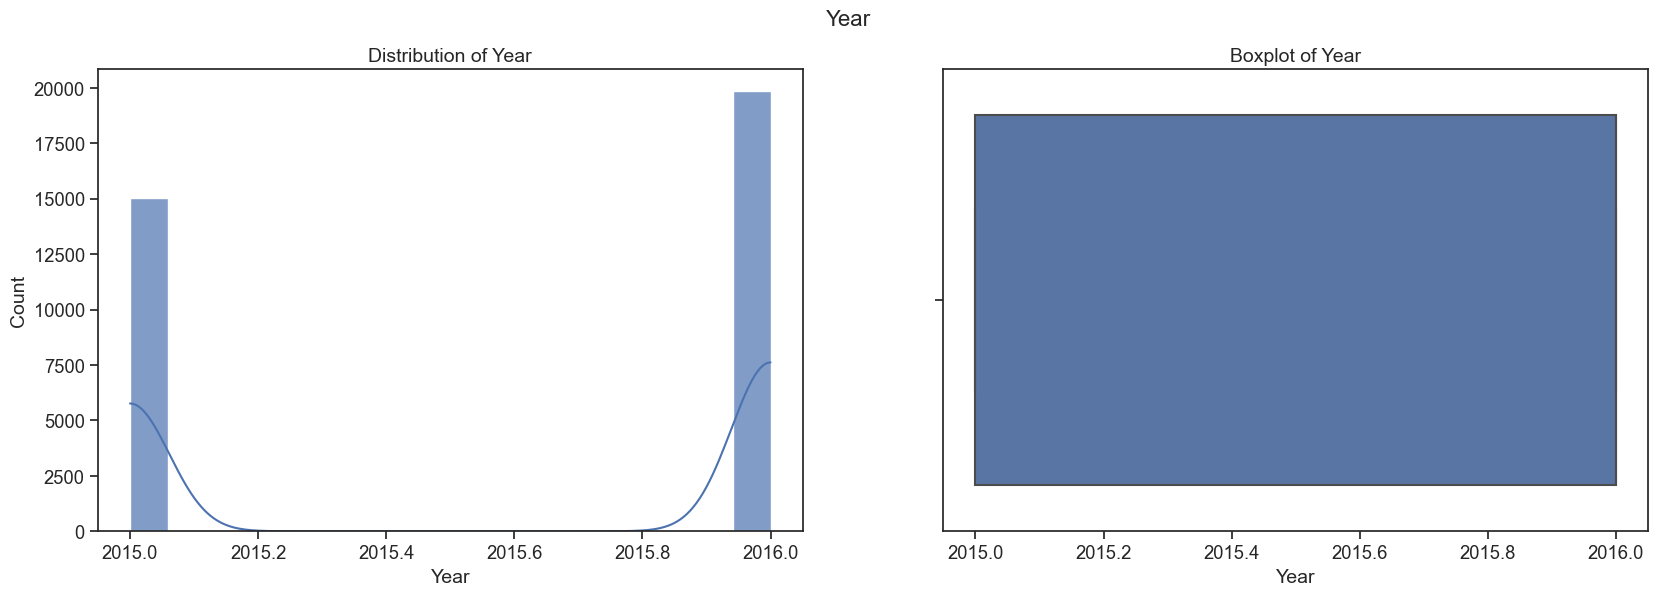

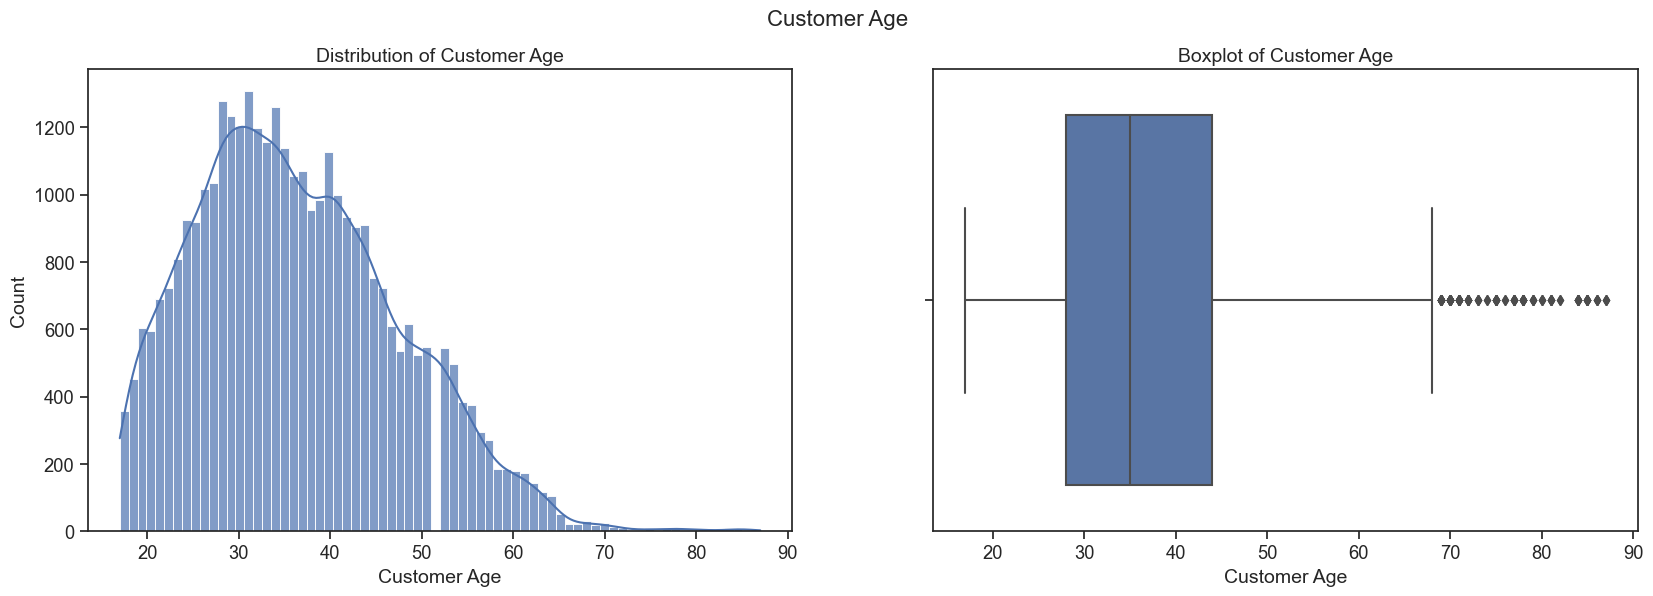

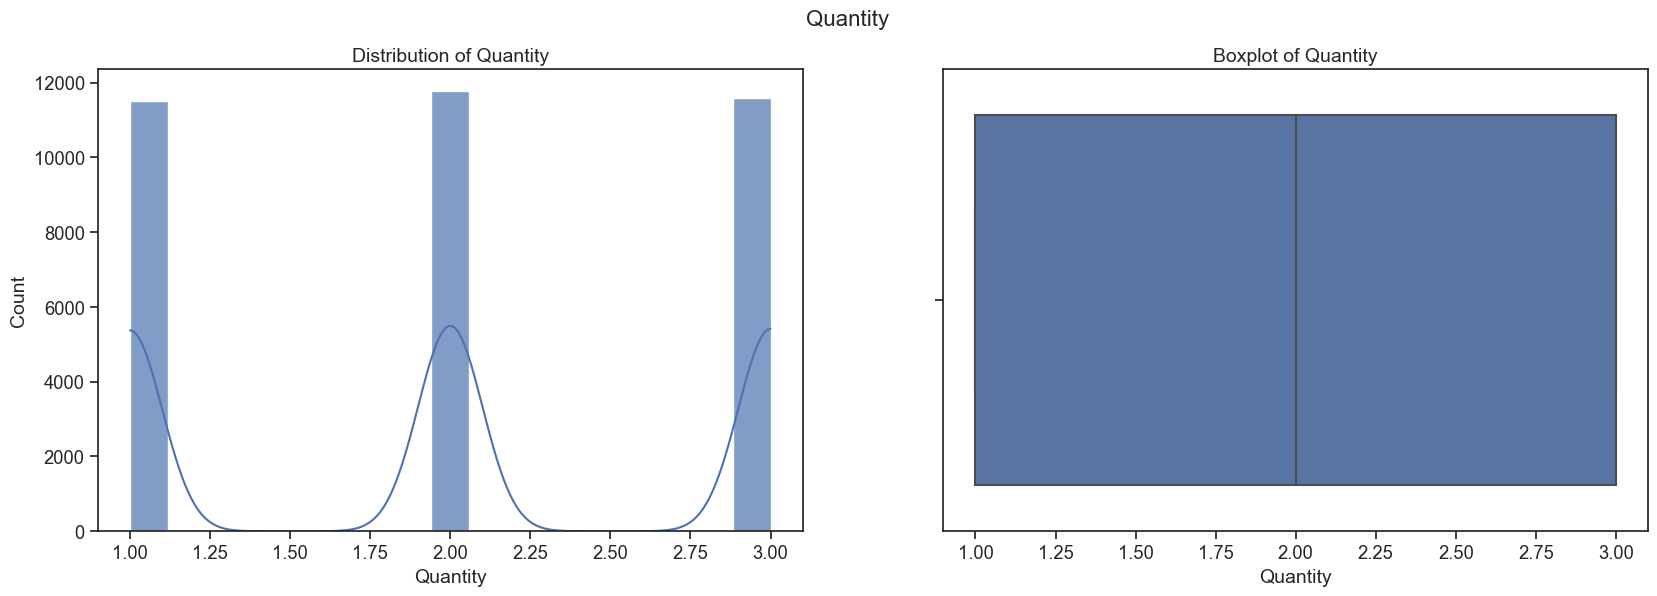

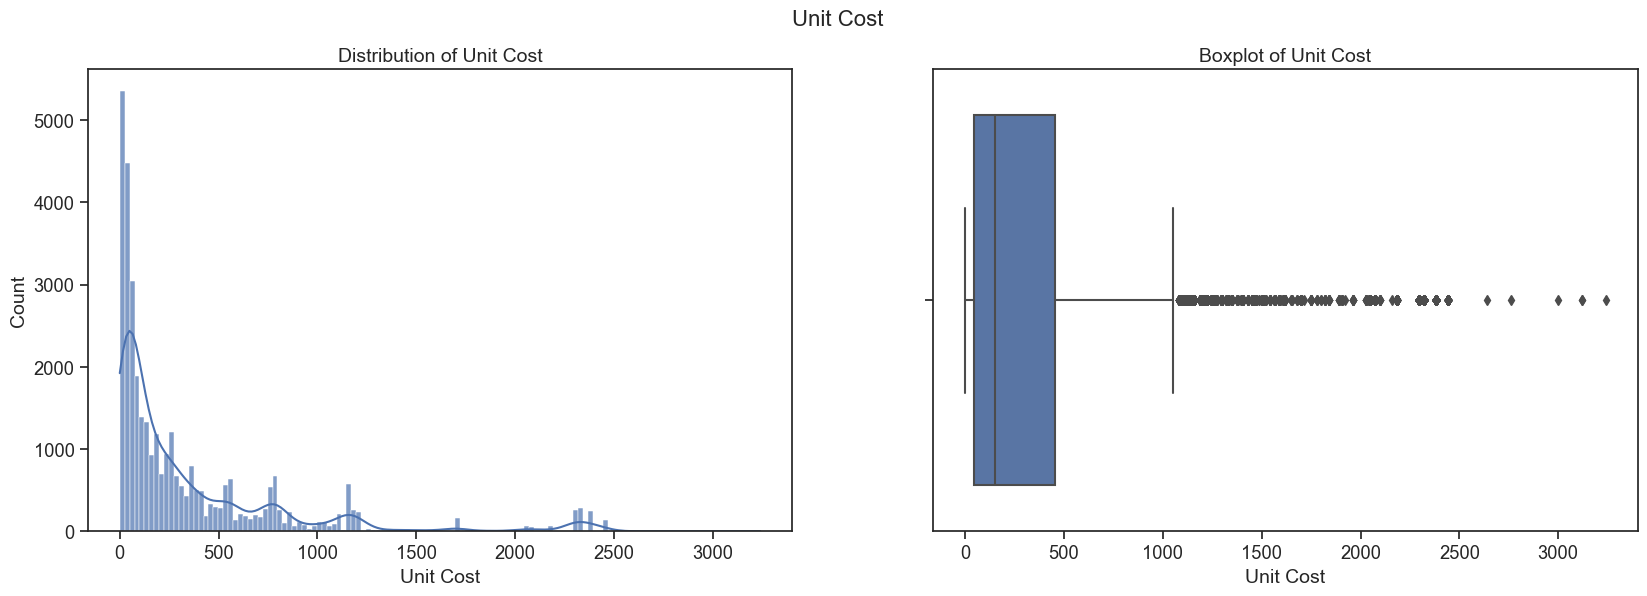

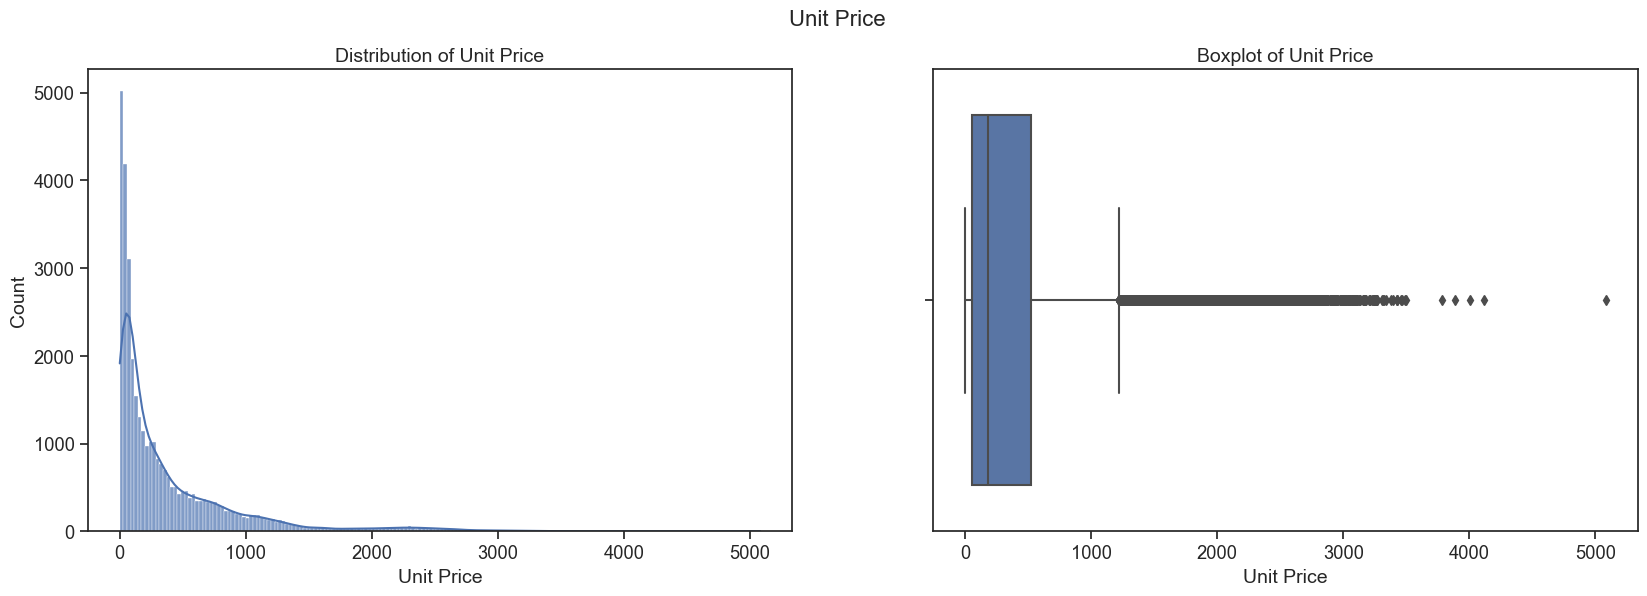

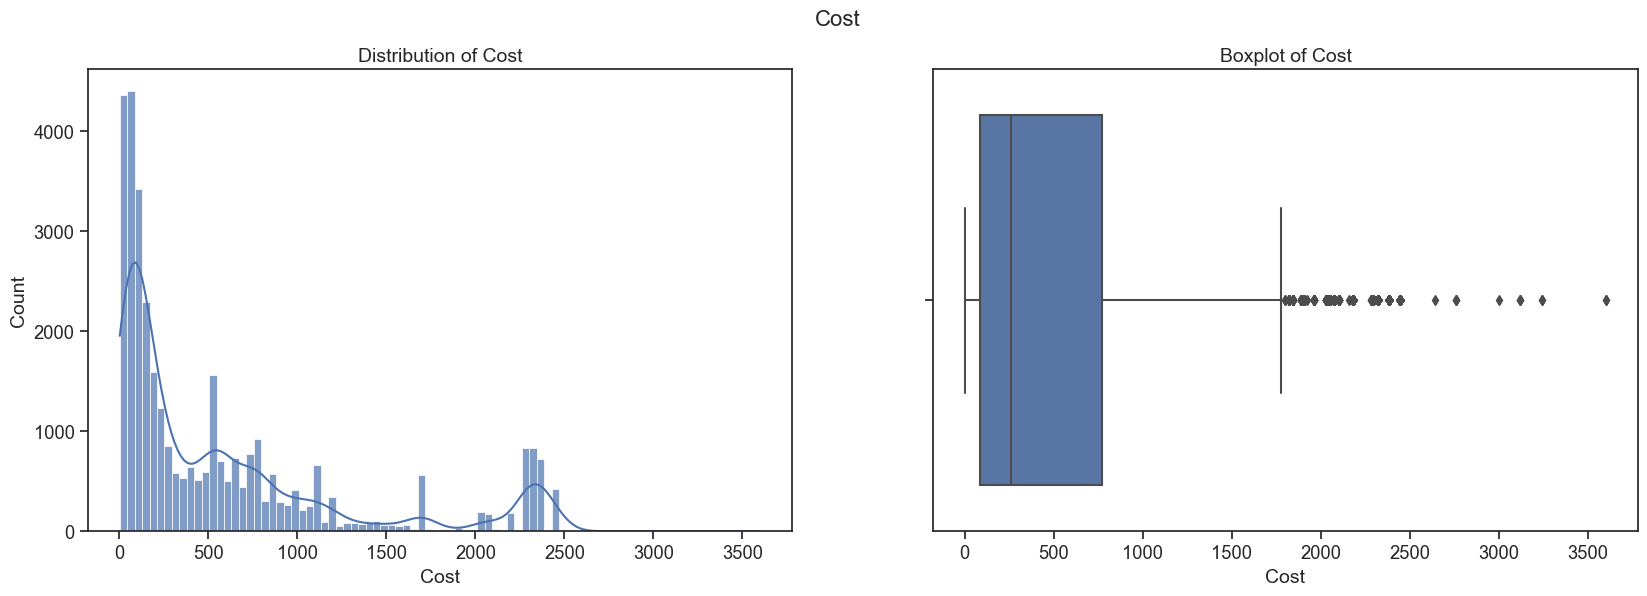

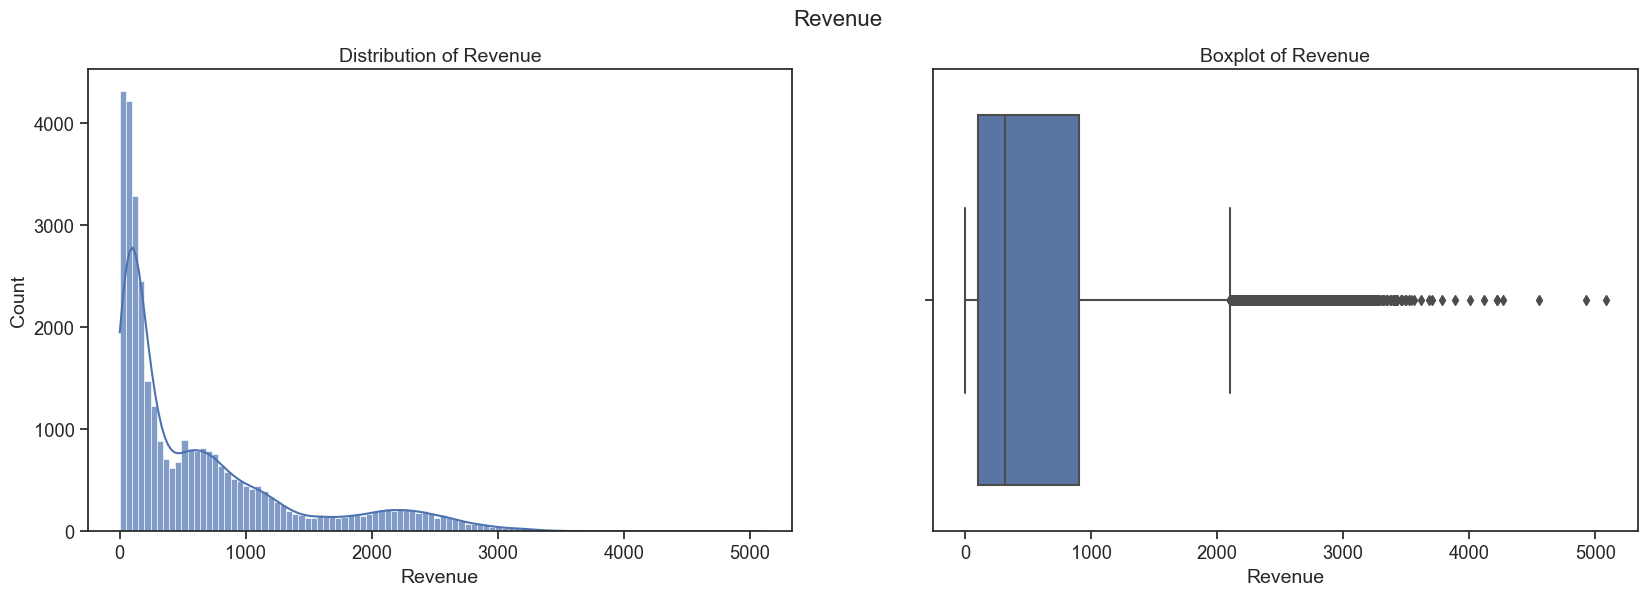

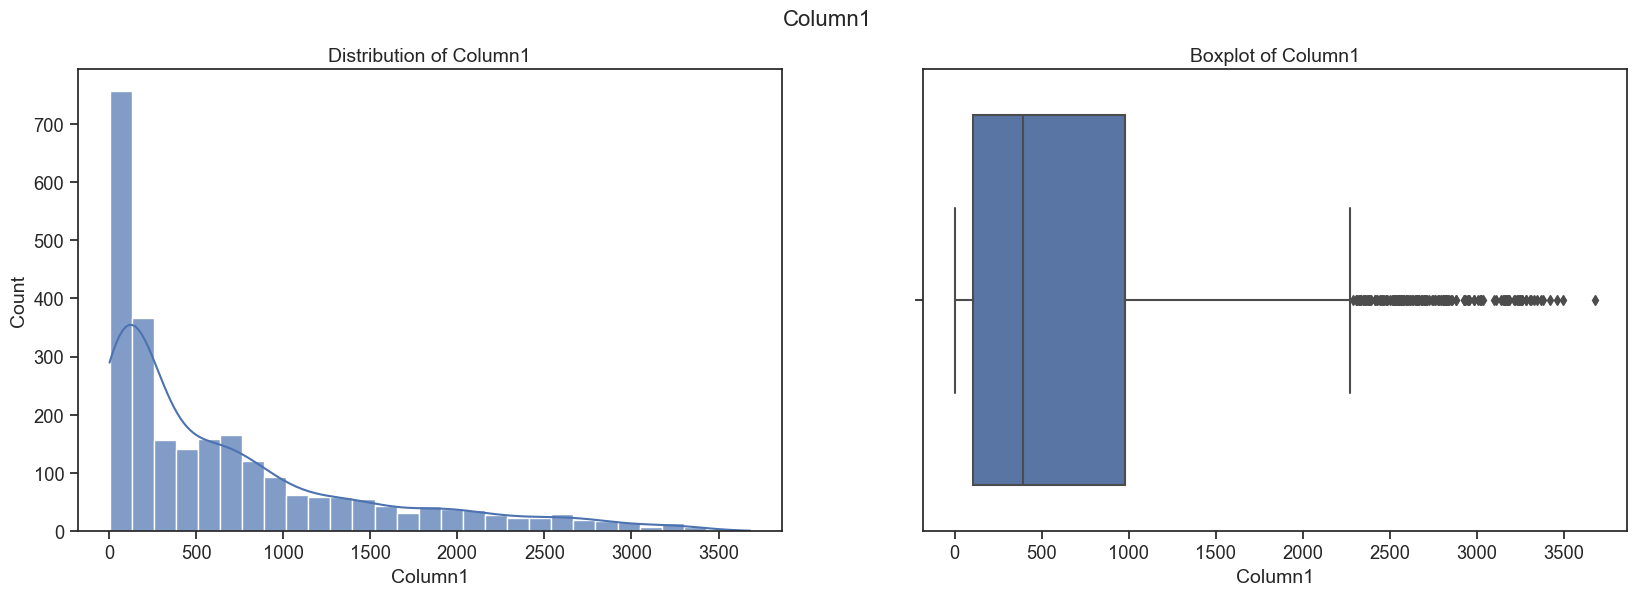

In [72]:
# Plot numerical data
print("Numerical Data\n")
for i in df.select_dtypes("number").columns:
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    sns.histplot(data=df[i], ax=ax[0], kde=True, alpha=0.7)
    sns.boxplot(x=df[i], ax=ax[1]) # x instead of data for horizontal

    fig.suptitle(i, fontsize=16)
    ax[0].set_xlabel(i, fontsize=14)
    ax[0].set_ylabel('Count', fontsize=14)
    ax[0].set_title('Distribution of ' + i, fontsize=14)
    ax[1].set_xlabel(i, fontsize=14)
    ax[1].set_ylabel('')
    ax[1].set_title('Boxplot of ' + i, fontsize=14)

    plt.show()

In [77]:
print("Numerical columns unique values sample\n")
# Get numerical columns unique values
object_cols = df.select_dtypes("number").drop(columns=["index", "Unit Cost", "Unit Price", "Cost", "Column1"])
for i in object_cols:
    print(i)
    print(df[i].unique())
    print("")

Numerical columns unique values sample

Year
[2016. 2015.   nan]

Customer Age
[29. 18. 19. 20. 22. 24. 40. 21. 23. 25. 30. 55. 53. 52. 51. 50. 49. 48.
 47. 46. 45. 41. 42. 65. 64. 32. 33. 63. 34. 35. 43. 62. 37. 44. 60. 59.
 58. 36. 61. 57. 54. 38. 39. 27. 28. 17. 26. 67. 66. 71. 31. 56. 87. 70.
 69. 73. 68. 75. 86. 85. 77. 81. 84. 78. 72. 80. 74. 76. 79. 82. nan]

Quantity
[ 1.  2.  3. nan]

Revenue
[ 109.         57.         15.       ... 1748.       1971.
  641.532095]



<a name="section2-2"></a>
## Data Cleaning

<a name="section2-2-1"></a>
#### Removing unnecessary columns

In [78]:
# Drop 'Column1' and 'index'
df.drop(['index', 'Column1'], axis=1, inplace=True)

<a name="section2-2-2"></a>
#### Dropping missing values

In [79]:
# Drop cells with NaN values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

<a name="section2-3"></a>
## Data Optimization

<a name="section2-3-1"></a>
#### Optimize datatypes

In [43]:
print("Before data optimization")
df.dtypes

Before data optimization


Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
dtype: object

In [4]:
# Optimize numerical datatypes
df['Date'] = pd.to_datetime(df['Date'])

# Convert Year to integer
df['Year'] = df['Year'].astype(int)

# Convert Customer Age to integer
df['Customer Age'] = df['Customer Age'].astype(int)

# Convert Quantity to integer
df['Quantity'] = df['Quantity'].astype(int)

In [5]:
# Optimize object-datatypes to categorical
cat_columns = ['Month', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category']
for col in cat_columns:
    df[col] = df[col].astype('category')


In [46]:
print("After data optimization")
df.dtypes

After data optimization


Date                datetime64[ns]
Year                         int32
Month                     category
Customer Age                 int32
Customer Gender           category
Country                   category
State                     category
Product Category          category
Sub Category              category
Quantity                     int32
Unit Cost                  float64
Unit Price                 float64
Cost                       float64
Revenue                    float64
dtype: object

In [47]:
print("Sales per year")
df.Year.value_counts()

Sales per year


2016    19847
2015    15019
Name: Year, dtype: int64

In [27]:
# export the cleaned df to csv
# df.to_csv("SalesForCourse_quizz_table_clean.csv", index=False)

<br>
<hr style="border:1px solid brown"> </hr>

<a name="section3"></a>
# Exploratory Data Analysis (EDA)

<a name="section3-1"></a>
## Business Profitability Analysis
- Is this business making or loosing money?
- Business growth and margins over time

**Calculate Margin, add new columns: `Margin` and `Total Margin`**  
`Margin` = `Price` - `Cost`  
`Total Margin` = `Margin` * `Quantity`  

In [48]:
# Margin per unit
df['Margin'] = df['Unit Price'] - df['Unit Cost']

In [49]:
# Total margin per sale
df['Total Margin'] = df['Margin'] * df['Quantity']

In [50]:
df.head(2)

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Margin,Total Margin
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.0,109.0,80.0,109.0,29.0,29.0
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.5,28.5,49.0,57.0,4.0,8.0


<a name="section3-1-1"></a>
### Negative Margin Discovery

In [21]:
margin_stats = df['Margin'].describe()
print("Margin Statistics")
print(margin_stats)

if (df['Margin'] < 0).any():
    print("\nThere are negative values in the Margin column.")
else:
    print("There are no negative values in the Margin column.")

Margin Statistics
count    34866.000000
mean        39.351919
std        104.934925
min       -937.000000
25%          3.000000
50%         14.500000
75%         53.000000
max       1842.000000
Name: Margin, dtype: float64

There are negative values in the Margin column.


**Comments**
- The Margin column has negative values which means that the company is losing money on some sales.
- The minimum value of -937 indicates that the company is losing a significant amount on certain sales. 
- We may want to investigate further to identify the specific products or categories that are causing these losses and make adjustments to pricing or cost structures to improve profitability.

<a name="section3-1-2"></a>
### Margins Over Time

In [185]:
# Set Style
sns.set(style="ticks", font="Calibri", font_scale=1.2, rc={"grid.linestyle": "-", "axes.grid": False})

The chart looks noisy


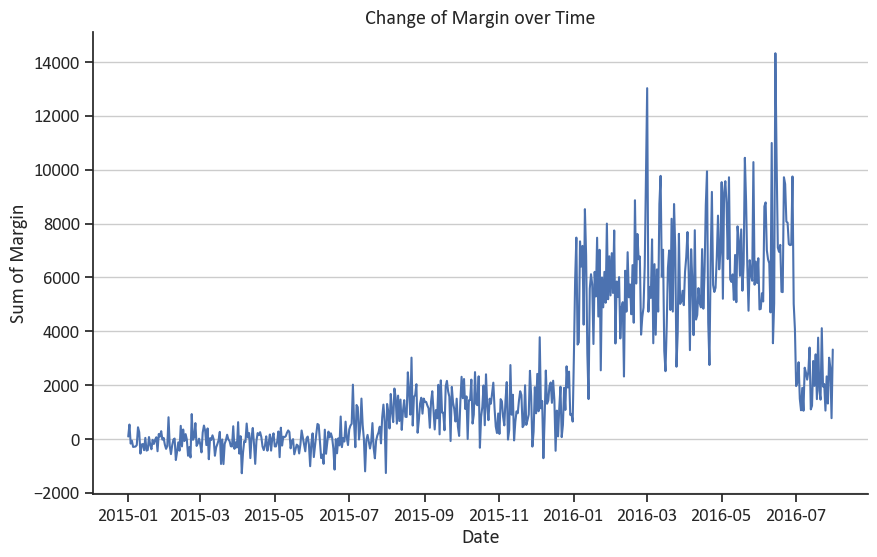

In [68]:
print("The chart looks noisy")

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(margin_by_day.index, margin_by_day.values)

sns.despine()
plt.grid(axis='y')

ax.set_xlabel('Date')
ax.set_ylabel('Sum of Margin')
ax.set_title('Change of Margin over Time')
plt.show()

<a name="section3-1-2-1"></a>
#### Monthly Resampling

There seems to be four business phases


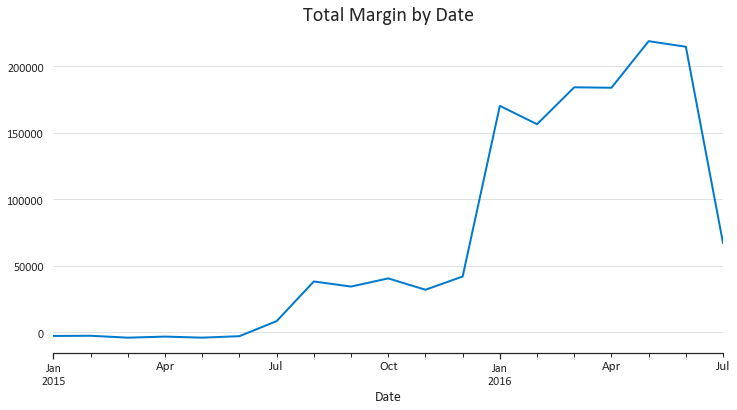

In [47]:
print("There seems to be four business phases")

# Define the color palette
colors = ['#007acc']

margin = df.groupby('Date')['Margin'].sum()

# Create a line plot of the margin by date
plt.figure(figsize=(12, 6))
margin.resample('m').sum().plot(kind='line', color=colors[0], linewidth=2)

# Add a title and axis labels
plt.title('Total Margin by Date', fontsize=20)
plt.xlabel('Date', fontsize=14)
#plt.ylabel('Total Margin', fontsize=14)

# Increase the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set grid layout
sns.despine(left=True) # remove spines
plt.gca().yaxis.set_ticks_position('none') # remove y-ticks (w/ ax)
# ax.yaxis.set_ticks_position('none') # remove y-tick (w/o ax)
plt.grid(axis='y', linestyle='-', alpha=0.7, color="lightgray") # add gridlines

plt.show()

<br>
<hr style="border:1px solid brown"> </hr>

<a name="section4"></a>
# The Four Phases

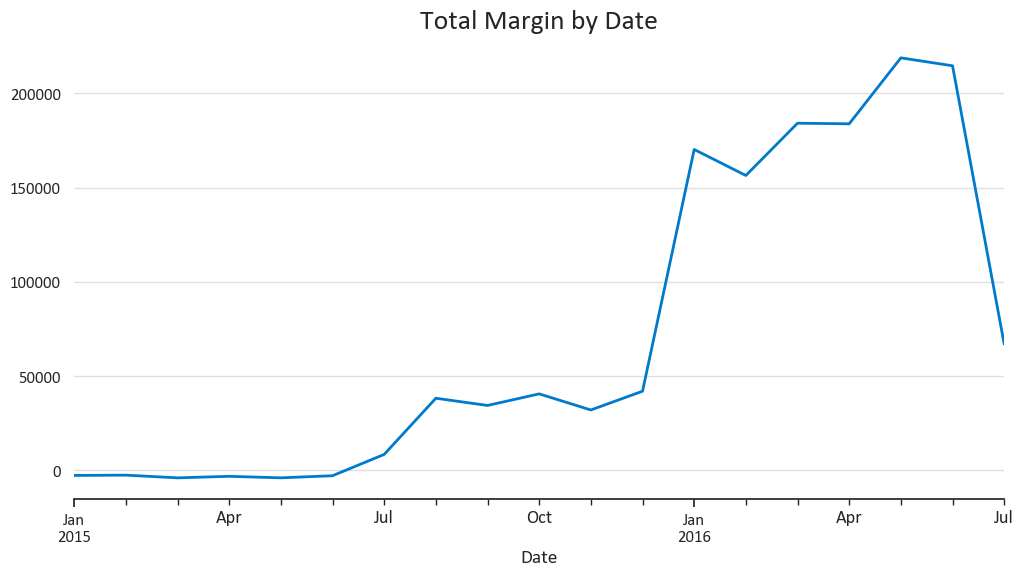

In [6]:
# Define the color palette
colors = ['#007acc']

margin = df.groupby('Date')['Margin'].sum()

# Create a line plot of the margin by date
plt.figure(figsize=(12, 6))
margin.resample('m').sum().plot(kind='line', color=colors[0], linewidth=2)

# Add a title and axis labels
plt.title('Total Margin by Date', fontsize=20)
plt.xlabel('Date', fontsize=14)
#plt.ylabel('Total Margin', fontsize=14)

# Increase the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set grid layout
sns.despine(left=True) # remove spines
plt.gca().yaxis.set_ticks_position('none') # remove y-ticks (w/ ax)
# ax.yaxis.set_ticks_position('none') # remove y-tick (w/o ax)
plt.grid(axis='y', linestyle='-', alpha=0.7, color="lightgray") # add gridlines

plt.show()

<a name="section4-1"></a>
## Phase 1: Negative Margins

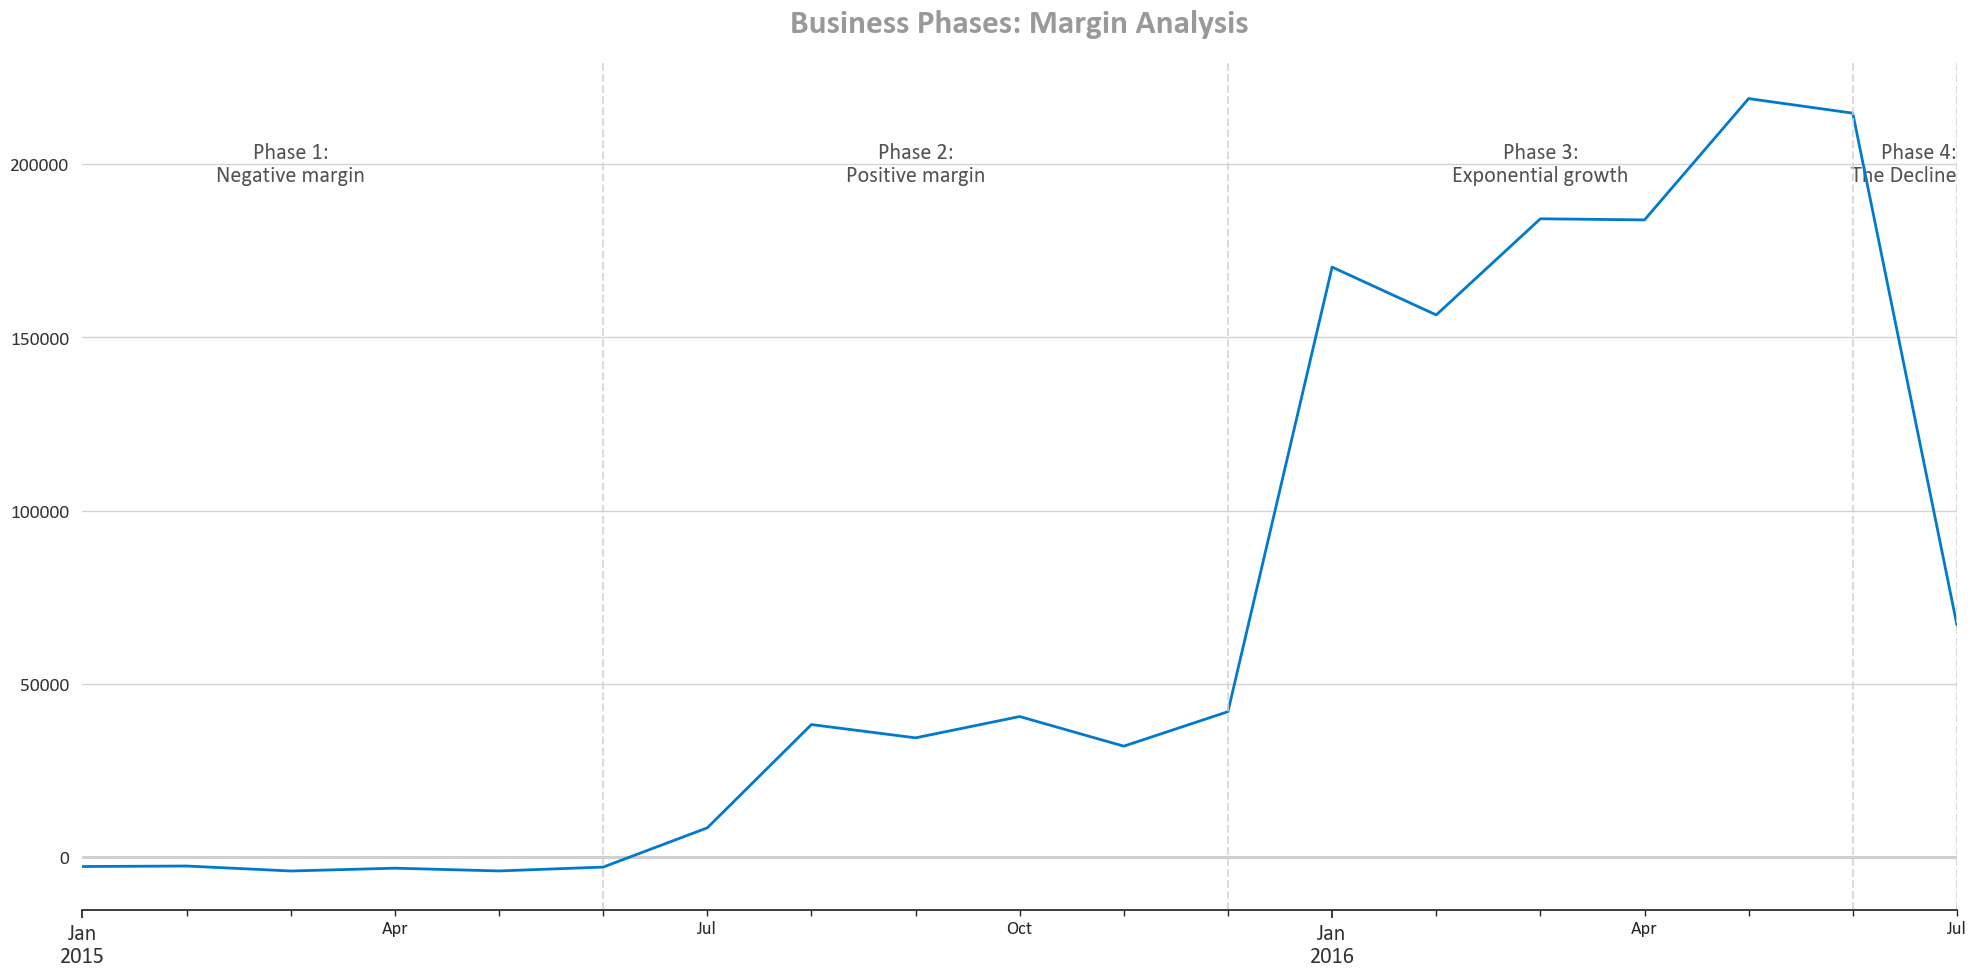

In [7]:
# Define the color palette
colors = ['#007acc']

# Create the line plot
plt.figure(figsize=(20, 10))
margin.resample('m').sum().plot(kind='line', color=colors[0], linewidth=2)

# Add vertical lines for each phase
plt.axvline('2015-06', linestyle='--', color='lightgray', alpha=0.8)
plt.axvline('2015-12', linestyle='--', color='lightgray', alpha=0.8)
plt.axvline('2016-06', linestyle='--', color='lightgray', alpha=0.8)
plt.axvline('2016-07', linestyle='--', color='lightgray', alpha=0.8)

# Annotate each phase with text
plt.text('2015-03', 200000, 'Phase 1:\nNegative margin', ha='center', va='center', fontsize=16, alpha=0.8)
plt.text('2015-09', 200000, 'Phase 2:\nPositive margin', ha='center', va='center', fontsize=16, alpha=0.8)
plt.text('2016-03', 200000, 'Phase 3:\nExponential growth', ha='center', va='center', fontsize=16, alpha=0.8)
plt.text('2016-07', 200000, 'Phase 4:\nThe Decline', ha='right', va='center', fontsize=16, alpha=0.8, zorder=0)

# Remove spines and add gridlines
sns.despine(left=True)
plt.gca().yaxis.set_ticks_position('none')
plt.grid(axis='y', color='lightgrey')

# Set the x-axis label and tick labels
plt.xlabel('', fontsize=16, color='gray', alpha=0.8)

# Set the y-axis label and tick labels
plt.yticks(fontsize=14, color='black', alpha=0.8)

# Set the x-axis label and tick labels
plt.xticks(fontsize=16, color='black', alpha=0.8)

# Add grid line at 0
plt.axhline(0, color='black', linestyle='-', linewidth=1, zorder=0)

# Set the title and adjust the layout
plt.title('Business Phases: Margin Analysis', fontsize=24, fontweight='bold', color='gray', alpha=0.8, pad=20)
plt.tight_layout()

# Show the plot
plt.show()

<a name="section4-1-1"></a>
### Substantially Higher Margins in Germany

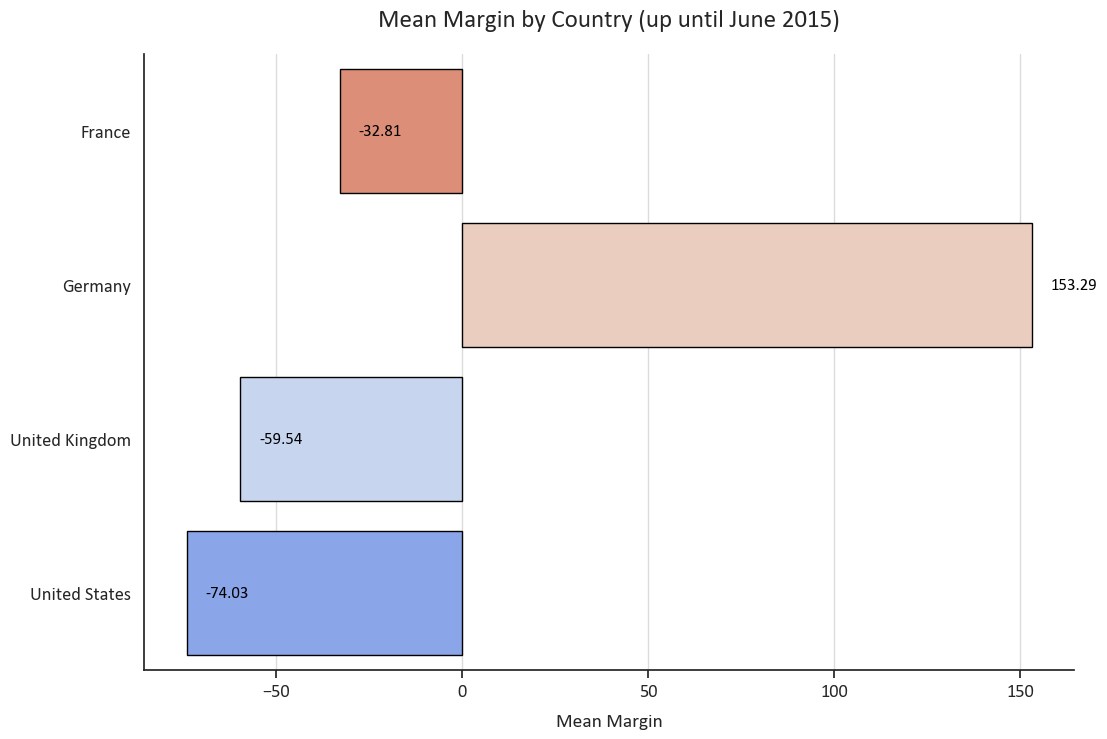

In [4]:
# Filter the data up until June 2015
df_period = df[df['Date'] <= '2015-06']

# Group the data by country and calculate the mean of the Margin column
mean_margin_by_country = df_period.groupby('Country')['Margin'].mean().reset_index()

# Sort the data by mean margin in descending order
mean_margin_by_country.sort_values('Margin', ascending=False, inplace=True)

# Create a larger figure
plt.figure(figsize=(12, 8))

# Use a custom color palette
palette = sns.color_palette("coolwarm_r", n_colors=len(mean_margin_by_country))

# Plot the mean margin for each country using horizontal bars
sns.barplot(x='Margin', y='Country', data=mean_margin_by_country, palette=palette, edgecolor='black', linewidth=1)

# Set grid layout
sns.despine()
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.gca().yaxis.set_ticks_position('none')

# Customize the title and axis labels
plt.title('Mean Margin by Country (up until June 2015)', fontsize=18, pad=20)
plt.xlabel('Mean Margin', fontsize=14, labelpad=10)
plt.ylabel('', fontsize=14, labelpad=10)

# Add annotations with values next to the bars
for index, row in mean_margin_by_country.iterrows():
    plt.text(row.Margin + 5, index, f"{row.Margin:.2f}", color='black', ha="left", va="center", fontsize=12)

# Show the plot
plt.show()


<a name="section4-2"></a>
## Phase 2: The New Product Line
- Accessories
- Clothing

In [50]:
print("First sale per Product Category")
# group by product category and find the earliest date
first_dates = df.groupby('Product Category')['Date'].min()

# print the first date for each product category
for category, date in first_dates.iteritems():
    print(f"{category}: {date}")

First sale per Product Category
Accessories: 2015-07-01 00:00:00
Bikes: 2015-01-01 00:00:00
Clothing: 2015-07-01 00:00:00


<a name="section4-2-1"></a>
#### The most profitable products

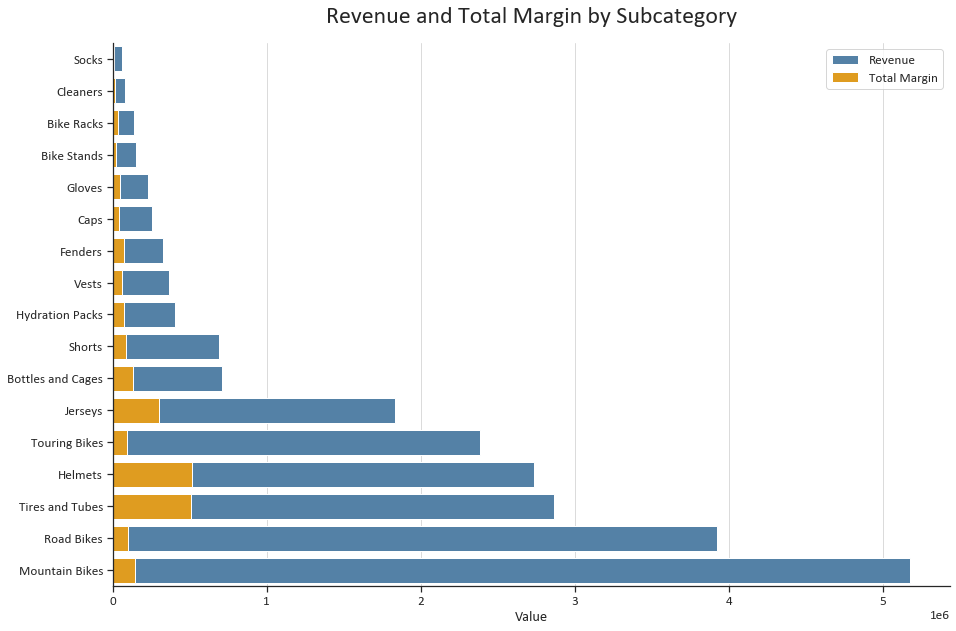

In [3]:
# Set Style
sns.set(style="ticks", font="Calibri", font_scale=1.2, rc={"grid.linestyle": "-", "axes.grid": False})

# Group the data by subcategory and calculate the sum of the Revenue column
subcategories_revenue = df.groupby('Sub Category')['Revenue'].sum().reset_index()

# Group the data by subcategory and calculate the sum of the Total Margin column
subcategories_margin = df.groupby('Sub Category')['Total Margin'].sum().reset_index()

# Merge the two dataframes
subcategories = pd.merge(subcategories_revenue, subcategories_margin, on='Sub Category')

# Sort the data by Revenue in descending order
subcategories.sort_values('Revenue', ascending=True, inplace=True)

# Plot the Revenue and Total Margin for each subcategory
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Revenue', y='Sub Category', data=subcategories, color='steelblue', label='Revenue', order=subcategories["Sub Category"])
sns.barplot(x='Total Margin', y='Sub Category', data=subcategories, color='orange', label='Total Margin', order=subcategories["Sub Category"])

# Set grid layout
sns.despine()
plt.grid(axis='x', linestyle='-', alpha=0.7, zorder=0)

ax.set_xlabel('Value')
ax.set_ylabel('')
ax.legend()
plt.title('Revenue and Total Margin by Subcategory', pad=20, fontsize=24)
plt.show()

<a name="section4-2-2"></a>
#### Revenue and Margin Trends After New Product Introductions

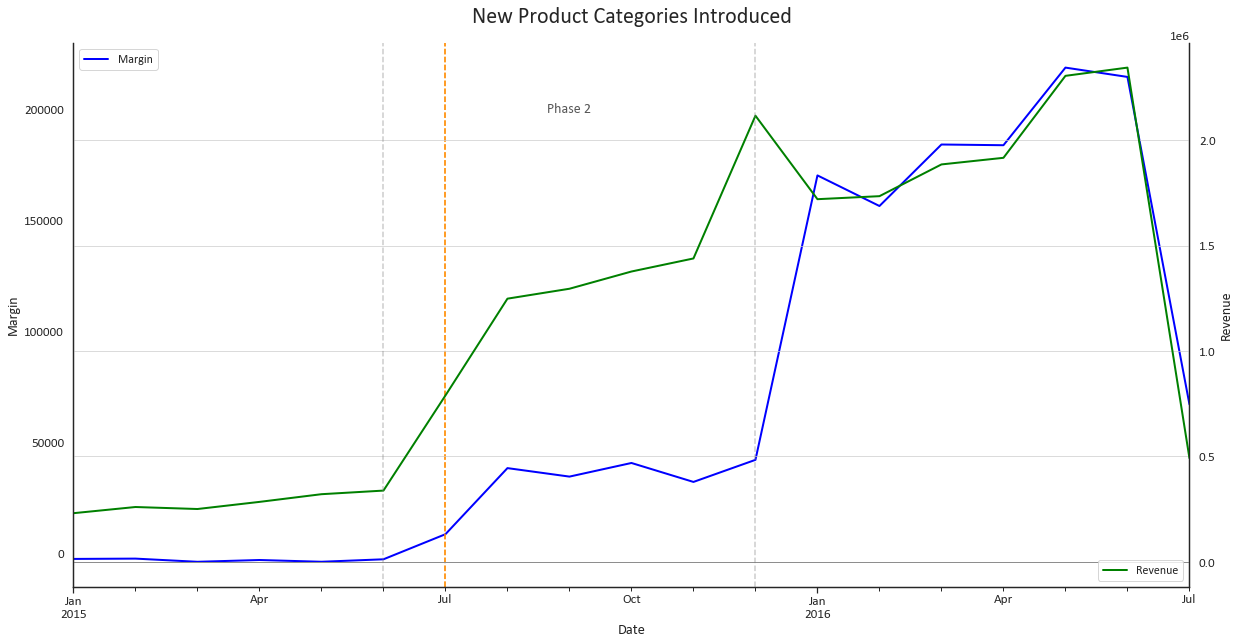

In [5]:
# Create a dataframe of the earliest date when each product category was sold
cat_dates = df.groupby('Product Category')['Date'].min().reset_index()

# Create a line plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

# Plot the margin and revenue on the first y-axis and second y-axis respectively
margin = df.groupby('Date')[['Revenue', 'Margin']].sum()
margin['Margin'].resample('M').sum().plot(kind='line', ax=ax1, color='blue', label='Margin', linewidth=2)
margin['Revenue'].resample('M').sum().plot(kind='line', ax=ax2, color='green', label='Revenue', linewidth=2)

#Add vertical lines for the introduction of new product categories
for index, row in cat_dates.iterrows():
    ax1.axvline(row['Date'], linestyle='--', color='darkorange', alpha=0.8)
    
# Add grid line at 0
plt.axhline(0, color='black', linestyle='-', linewidth=1, zorder=0)

# Convert string to datetime object
date_1 = pd.to_datetime('2015-06')
date_2 = pd.to_datetime('2015-12')

# Add vertical lines for each phase
plt.axvline(date_1, linestyle='--', color='gray', alpha=0.4)
plt.axvline(date_2, linestyle='--', color='gray', alpha=0.4)

# add text annotation for Phase 2
ax1.annotate('Phase 2', xy=(pd.to_datetime('2015-09'), 200000), xytext=(pd.to_datetime('2015-09'), 200000), arrowprops=dict(facecolor='darkorange', arrowstyle="->"), ha='center', va='center', fontsize=14, color="black", alpha=0.65)

# Set axis labels, legends, and grid
ax1.set_ylabel('Margin', fontsize=14)
ax2.set_ylabel('Revenue', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='lower right', fontsize=12)
ax1.set_title('New Product Categories Introduced', fontsize=22, pad=20)
sns.despine(top=True, right=False)
plt.grid(axis='y', linestyle='-', alpha=0.7)
ax1.yaxis.set_ticks_position('none')
ax2.yaxis.set_ticks_position('none')

plt.show()


<a name="section4-2-3"></a>
#### Decline in Bike Sales, Growth in Accessories and Clothing

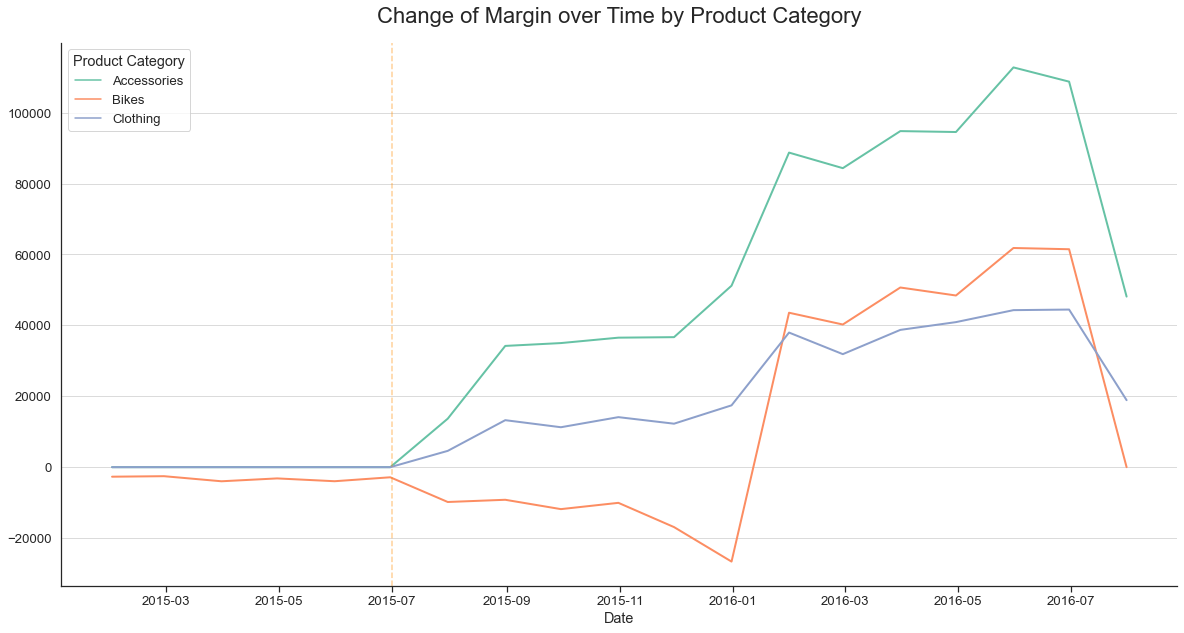

In [43]:
# Resample the data by month and get the sum of margin for each category
margin_by_month_category = df.groupby(['Product Category', pd.Grouper(key='Date', freq='M')])['Margin'].sum().reset_index()

# set the style of the plot
sns.set_style("whitegrid")
sns.set(font_scale=1.2, font="Arial", style="ticks")

# Create a palette with one color for each category
palette = sns.color_palette("Set2", len(df["Product Category"].unique()))

# Create a line chart with multiple lines
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=margin_by_month_category, x='Date', y='Margin', hue='Product Category', ax=ax, palette=palette, linewidth=2)
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.gca().yaxis.set_ticks_position('none') # remove y-ticks (w/o ax)

# # Add grid line at 0
# plt.axhline(0, color='black', linestyle='-', linewidth=1)

# convert string to datetime object
date_1 = pd.to_datetime('2015-07')
#date_2 = pd.to_datetime('2015-12')
# add vertical lines for each phase
plt.axvline(date_1, linestyle='--', color='darkorange', alpha=0.4)
#plt.axvline(date_2, linestyle='--', color='gray', alpha=0.4)

ax.set_xlabel('Date')
ax.set_ylabel('')
ax.set_title('Change of Margin over Time by Product Category', fontsize=22, pad=20)
plt.show()

<a name="section4-2-4" ></a>
### Correlation between Margin and Unit Price
- The key to higher margins may lie in the unit price

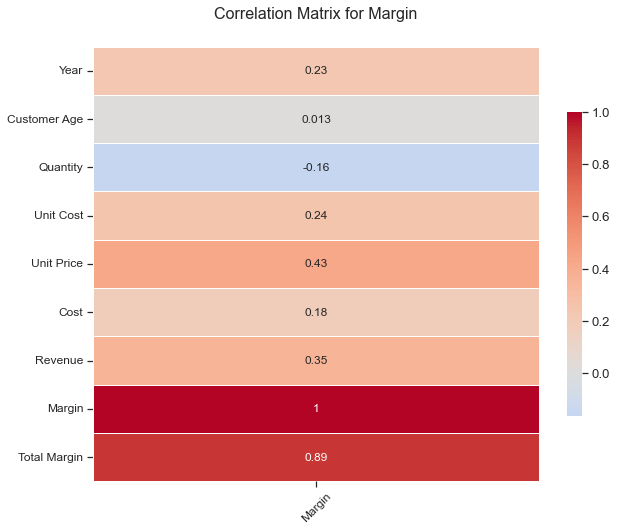

In [42]:
# create a correlation matrix of margin with all other variables
corr_matrix = df.corr()['Margin']

# plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.to_frame(), annot=True, cmap='coolwarm', center=0, cbar_kws={'shrink': 0.7}, linewidths=1, linecolor='white', annot_kws={"fontsize": 12})

# Set title, adjust title position and size
plt.title('Correlation Matrix for Margin', fontsize=16, y=1.05)

# Adjust x and y tick labels
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

# Show the plot
plt.show()

<a name="section4-3"></a>
## Phase 3: The Comeback

<a name="section4-3-1"></a>
### Analyzing the US Market

<img src="https://iili.io/HXL22bj.jpg" alt="annie williams YOdDoQepmPE unsplash" border="0" width="1100">

<a name="section4-3-1-1"></a>
#### US Bike Margin Decline: March 2015 to January 2016

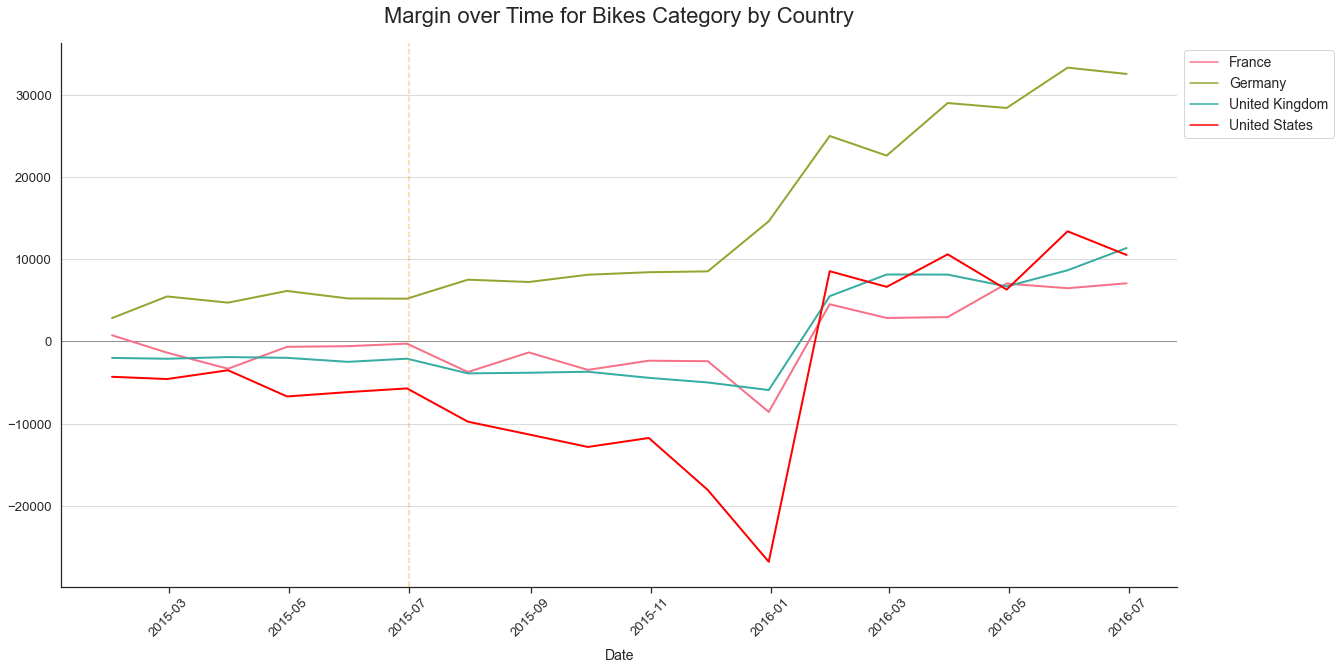

In [38]:
# Filter the dataset for the "Bikes" category
bikes_df = df[df['Product Category'] == 'Bikes'].copy()

# Group the data by 'Country' and 'Date', and calculate the sum of the margin for each group
bikes_margin_monthly = bikes_df.groupby(['Country', pd.Grouper(key='Date', freq='M')])['Margin'].sum().reset_index()

# Set the style and custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(bikes_margin_monthly['Country'].unique()))
custom_palette[3] = "red"  # Assuming United States is the first country in the 'Country' column

# Create a larger figure
plt.figure(figsize=(20, 10))

# Plot the margin for each country over time using line plot
sns.lineplot(data=bikes_margin_monthly, x="Date", y="Margin", hue="Country", linewidth=2, palette=custom_palette)

sns.despine()

# Customize the grid
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.gca().yaxis.set_ticks_position('none') # remove y-ticks (w/o ax)

# Add grid line at 0
plt.axhline(0, color='black', linestyle='-', linewidth=1, zorder=0)

# add vertical line for new release
date_1 = pd.to_datetime('2015-07')
plt.axvline(date_1, linestyle='--', color='darkorange', alpha=0.4)

# Customize the x and y axis labels
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.ylabel("", fontsize=14, labelpad=10)

# Customize the title
plt.title("Margin over Time for Bikes Category by Country", fontsize=22, pad=20)

# Customize the x-axis ticks
plt.xticks(rotation=45)

# Improve the legend
leg = plt.legend(title="", title_fontsize=16, fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
leg._legend_box.align = "left"

plt.show()


<a name="section4-3-1-2"></a>
#### US Bike Margin Rebound: Significant Impact in January 2016

In [17]:
sns.set(style="ticks", font="Calibri", font_scale=1.2, rc={"grid.linestyle": "-", "axes.grid": False})

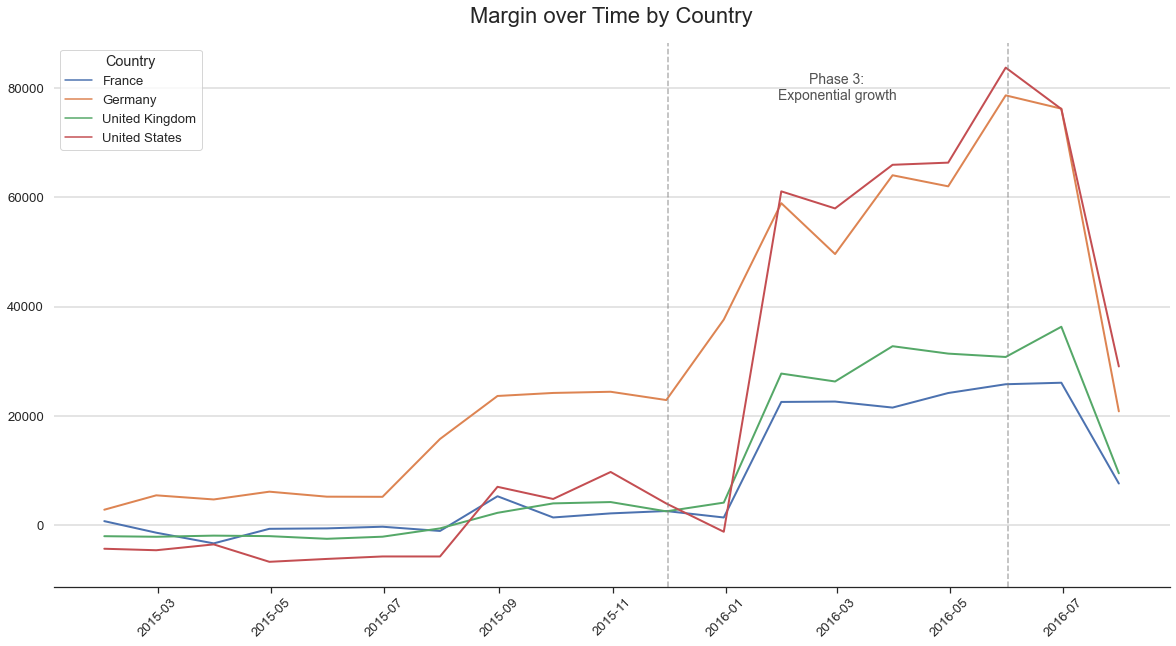

In [40]:
# group by country and date, and resample to monthly frequency
margin_by_country = df.groupby(['Country', pd.Grouper(key='Date', freq='M')])['Margin'].sum().reset_index()

# create a line plot showing margin over time for each country
plt.figure(figsize=(20, 10))
sns.lineplot(data=margin_by_country, x="Date", y="Margin", hue="Country", linewidth=2)

# set axis labels and title
plt.xlabel("")
plt.ylabel("")
plt.title("Margin over Time by Country", fontsize=22, pad=20)

# Set grid layout
sns.despine(left=True)
plt.gca().yaxis.set_ticks_position('none')
plt.grid(axis='y', linestyle='-', alpha=0.6, color="lightgray", linewidth=2)

# Add grid line at 0
# plt.axhline(0, color='black', linestyle='-', linewidth=1)

# convert string to datetime object
date_1 = pd.to_datetime('2015-12')
date_2 = pd.to_datetime('2016-06')
# add vertical lines for each phase
plt.axvline(date_1, linestyle='--', color='gray', alpha=0.6)
plt.axvline(date_2, linestyle='--', color='gray', alpha=0.6)

# add text annotation for Phase 3
date_3 = pd.to_datetime('2016-03')
plt.text(date_3, 80000, 'Phase 3:\nExponential growth', ha='center', va='center', fontsize=14, alpha=0.8)

# rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# show the plot
plt.show()


<a name="section4-3-1-3"></a>
#### Variability Across States: Certain States Outperforming Others

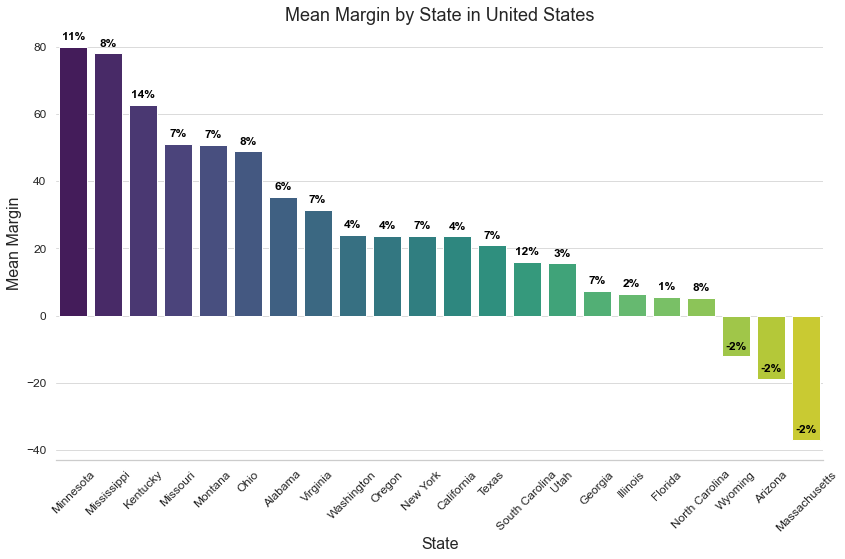

In [46]:
# Filter the data for United States
df_us = df[df['Country'] == 'United States'].copy()

# Remove trailing whitespaces and special characters from state names
df_us['State'] = df_us['State'].str.strip()

# Group the data by state and calculate the mean of the Margin column
mean_margin_by_state = df_us.groupby('State')['Margin'].mean()

# Group the data by state and calculate the sum of the Revenue and Margin columns
total_revenue_margin_by_state = df_us.groupby('State')[['Revenue', 'Margin']].sum()

# Calculate the percentage of revenue represented by margin for each state
total_revenue_margin_by_state['Margin %'] = (total_revenue_margin_by_state['Margin'] / total_revenue_margin_by_state['Revenue']) * 100

# Sort the data by mean margin in descending order
mean_margin_by_state.sort_values(ascending=False, inplace=True)

# Plot the mean margin for each state in United States
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", font_scale=1.2)
bar_plot = sns.barplot(x=mean_margin_by_state.index, y=mean_margin_by_state.values, palette='viridis')

# Set grid layout
sns.despine(left=True)
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add annotations above each bar with margin percentage of revenue
for i, p in enumerate(bar_plot.patches):
    state = p.get_x() + p.get_width() / 2
    margin_pct = total_revenue_margin_by_state.loc[mean_margin_by_state.index[i], 'Margin %']
    bar_plot.annotate(f"{margin_pct:.0f}%",
                      (state, p.get_height()),
                      ha="center",
                      va="bottom",
                      fontsize=12,
                      fontweight="bold",
                      color="black",
                      xytext=(0, 5),
                      textcoords="offset points")

plt.title('Mean Margin by State in United States', fontsize=18)
plt.xlabel('State', fontsize=16)
plt.ylabel('Mean Margin', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


<a name="section4-3-1-4"></a>
#### US Success: Mastery of Upselling Techniques

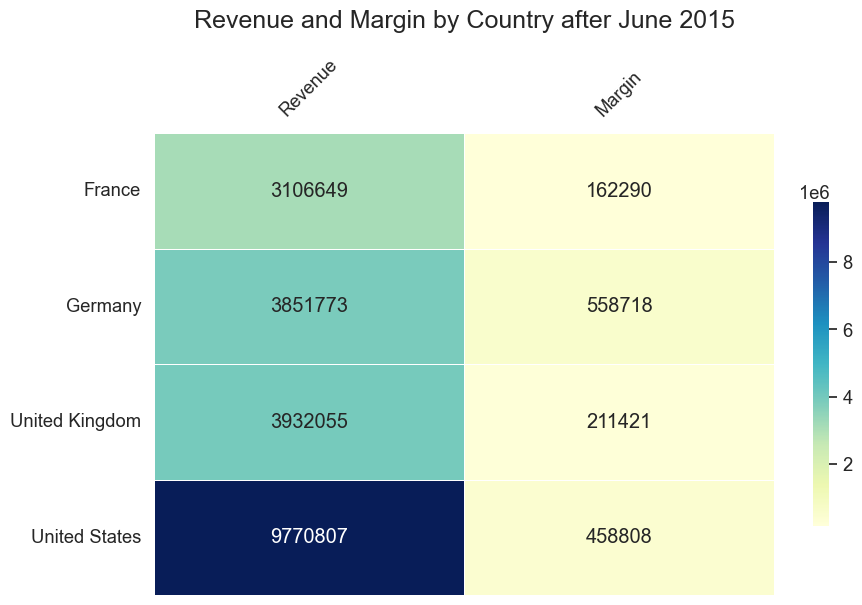

In [24]:
# Filter the data after June 2015
df_period = df[df['Date'] >= '2015-07']

# Group the data by country and calculate the sum of revenue and margin
revenue_margin_by_country = df_period.groupby('Country')[['Revenue', 'Margin']].sum()

# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a heatmap of revenue and margin by country
sns.heatmap(revenue_margin_by_country, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={"shrink": 0.7, 'label': ''})

# Customize the title
plt.title('Revenue and Margin by Country after June 2015', fontsize=18, pad=20)

# Customize the x and y axis labels
plt.xlabel('', fontsize=14, labelpad=10)
plt.ylabel('', fontsize=14, labelpad=10)

# Improve the appearance of the heatmap
sns.despine(bottom=True, left=True)
plt.gca().xaxis.tick_top()
plt.gca().yaxis.set_ticks_position('none')
plt.gca().xaxis.set_ticks_posivtion('none')
plt.xticks(rotation=45)

plt.show()

<a name="section5"></a>
# Insights #1: The Four Phases (full version)
- Phase 1: Negative margin - during this phase, the business was experiencing losses, and corrective actions needed to be taken to improve the margins.
- Phase 2: Positive margin, business growth - during this phase, the business started to grow, with an increase in revenue and a positive margin. 
    - **2015-06**: Started selling more
        - Explore correlation between Margin and Unit Price
    - **2015-07**: Added two new product category: "Accessories" and "Clothing".
    - Explore if new stores where opened i.e other countries?
    - "Bikes" margins rapid decrease
- Phase 3: Exponential growth - during this phase, the business experienced rapid growth, with significant increases in revenue, margin, and profits.
    - **2015-12**: Exponential increase in margins from "Accessories" and "Clothing".
    - **2016-01**: The margin for "Bikes" started improving rapidly and approached a break-even point where it was no longer incurring losses. This happened before Q2 when its margins matched those of "Clothing".
    - Business continued to increase the margins
- Phase 4: Recession - during this phase, the business experienced a sudden and rapid decline in both revenue and profit
    - **2016-07**
    - Further explore the reasons for the recession of the business such as: 
        - If the company had to implement cost-cutting measures and restructure its operations to survive and for what reason.
        - Or due to external factors such as a actual economic recession
        
**The only country that truly excelled in selling bicycles was Germany.**

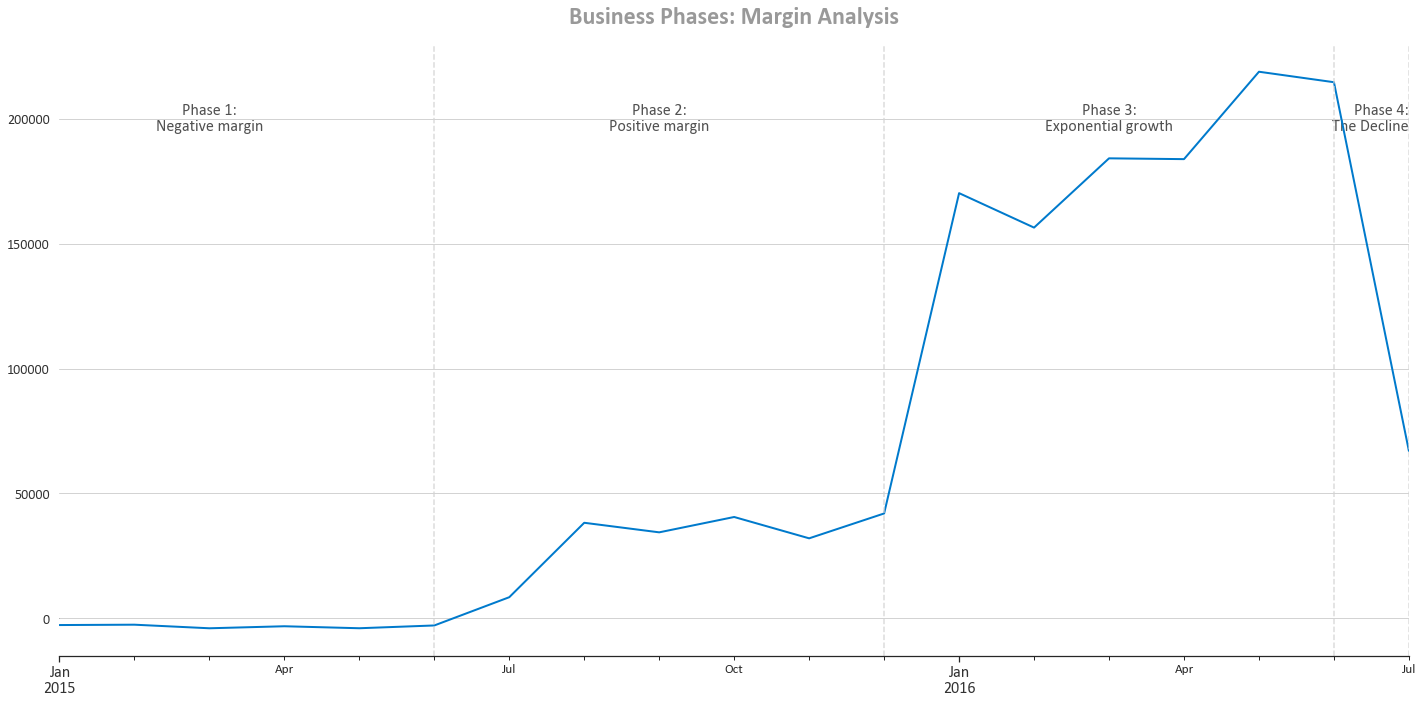

In [3]:
# Define the color palette
colors = ['#007acc']

# Create the line plot
plt.figure(figsize=(20, 10))
margin.resample('m').sum().plot(kind='line', color=colors[0], linewidth=2)

# Add vertical lines for each phase
plt.axvline('2015-06', linestyle='--', color='lightgray', alpha=0.8)
plt.axvline('2015-12', linestyle='--', color='lightgray', alpha=0.8)
plt.axvline('2016-06', linestyle='--', color='lightgray', alpha=0.8)
plt.axvline('2016-07', linestyle='--', color='lightgray', alpha=0.8)

# Annotate each phase with text
plt.text('2015-03', 200000, 'Phase 1:\nNegative margin', ha='center', va='center', fontsize=16, alpha=0.8)
plt.text('2015-09', 200000, 'Phase 2:\nPositive margin', ha='center', va='center', fontsize=16, alpha=0.8)
plt.text('2016-03', 200000, 'Phase 3:\nExponential growth', ha='center', va='center', fontsize=16, alpha=0.8)
plt.text('2016-07', 200000, 'Phase 4:\nThe Decline', ha='right', va='center', fontsize=16, alpha=0.8, zorder=0)

# Remove spines and add gridlines
sns.despine(left=True)
plt.gca().yaxis.set_ticks_position('none')
plt.grid(axis='y', color='lightgrey')

# Set the x-axis label and tick labels
plt.xlabel('', fontsize=16, color='gray', alpha=0.8)

# Set the y-axis label and tick labels
plt.yticks(fontsize=14, color='black', alpha=0.8)

# Set the x-axis label and tick labels
plt.xticks(fontsize=16, color='black', alpha=0.8)

# Add grid line at 0
plt.axhline(0, color='black', linestyle='-', linewidth=1, zorder=0)

# Set the title and adjust the layout
plt.title('Business Phases: Margin Analysis', fontsize=24, fontweight='bold', color='gray', alpha=0.8, pad=20)
plt.tight_layout()

# Show the plot
plt.show()

<br>
<hr style="border:1px solid brown"> </hr>

<a name="section6"></a>
# Germany's Path to Profitability in Bike Sales
<div style="float: left;">
<img src="https://iili.io/HXLfYjs.jpg" alt="tobias reich Cp4Hkd jVpQ unsplash" border="0" width="800">
</div>  
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
    
*Heidelberg*
   


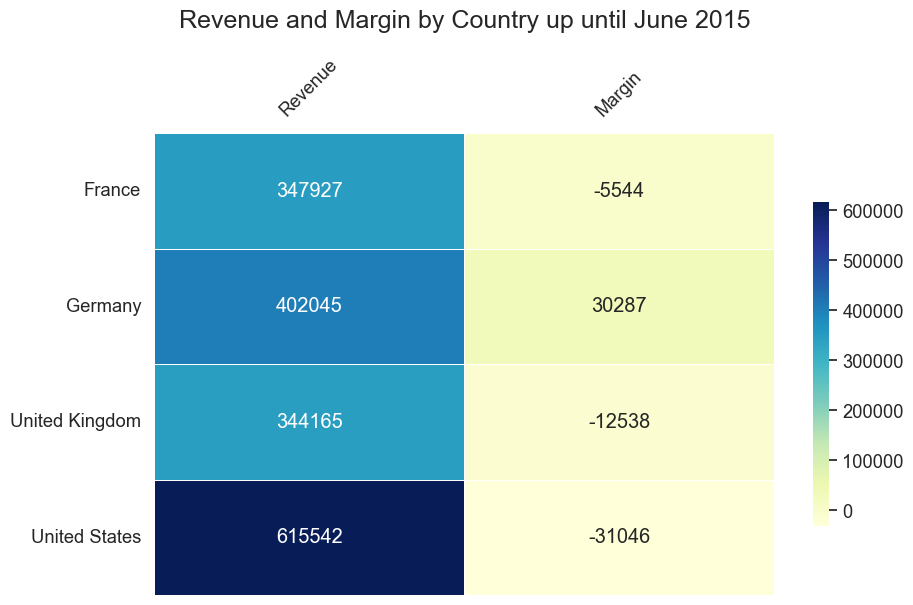

In [26]:
# Filter the data up until June 2015
df_period = df[df['Date'] <= '2015-07']

# Group the data by country and calculate the sum of revenue and margin
revenue_margin_by_country = df_period.groupby('Country')[['Revenue', 'Margin']].sum()

# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a heatmap of revenue and margin by country
sns.heatmap(revenue_margin_by_country, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={"shrink": 0.7, 'label': ''})

# Customize the title
plt.title('Revenue and Margin by Country up until June 2015', fontsize=18, pad=20)

# Customize the x and y axis labels
plt.xlabel('', fontsize=14, labelpad=10)
plt.ylabel('', fontsize=14, labelpad=10)

# Improve the appearance of the heatmap
sns.despine(bottom=True, left=True)
plt.gca().xaxis.tick_top()
plt.gca().yaxis.set_ticks_position('none')
plt.gca().xaxis.set_ticks_position('none')
plt.xticks(rotation=45)

plt.show()

<a name="section6-1"></a>
#### Slightly Increased Unit Cost
- Possible Indication of Superior Bike Quality in Germany?

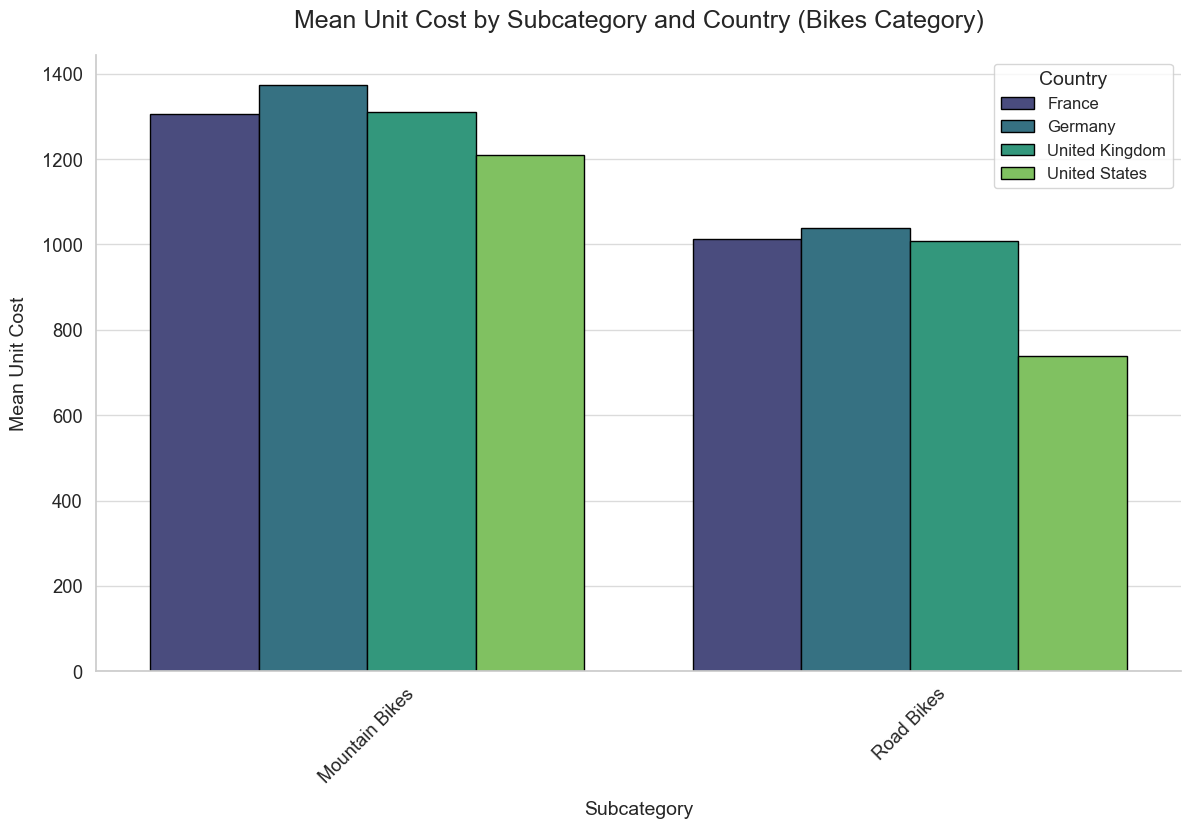

In [24]:
# Filter the data up until June 2015 for the Bikes category
df_period = df[(df['Date'] <= '2015-06') & (df['Product Category'] == 'Bikes')]

# Filter the data to remove subcategories with no sales
df_filtered = df_period[df_period['Revenue'] > 0].copy()

# Remove trailing whitespaces and special characters from state names using .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, 'Sub Category'] = df_filtered['Sub Category'].str.strip()

# Group the data by country and subcategory, and calculate the mean of the Unit Cost column
mean_unit_cost_by_country = df_filtered.groupby(['Country', 'Sub Category'])['Unit Cost'].mean().reset_index()

# Sort the data by country and mean unit cost in descending order
mean_unit_cost_by_country.sort_values(['Country', 'Unit Cost'], ascending=False, inplace=True)

# Create a larger figure
plt.figure(figsize=(14, 8))

# Plot the mean unit cost for each subcategory for each country using a custom color palette
sns.barplot(x='Sub Category', y='Unit Cost', hue='Country', data=mean_unit_cost_by_country, palette="viridis", edgecolor='black', linewidth=1)

# Set grid layout
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Customize the title and axis labels
plt.title('Mean Unit Cost by Subcategory and Country (Bikes Category)', fontsize=18, pad=20)
plt.xlabel('Subcategory', fontsize=14, labelpad=10)
plt.ylabel('Mean Unit Cost', fontsize=14, labelpad=10)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add a title for the legend
legend = plt.legend(title='Country', title_fontsize=14, fontsize=12)
legend.get_title().set_position((-10, 0))

# Show the plot
plt.show()


<a name="section6-2"></a>
#### Consistent Order Volume Across Countries

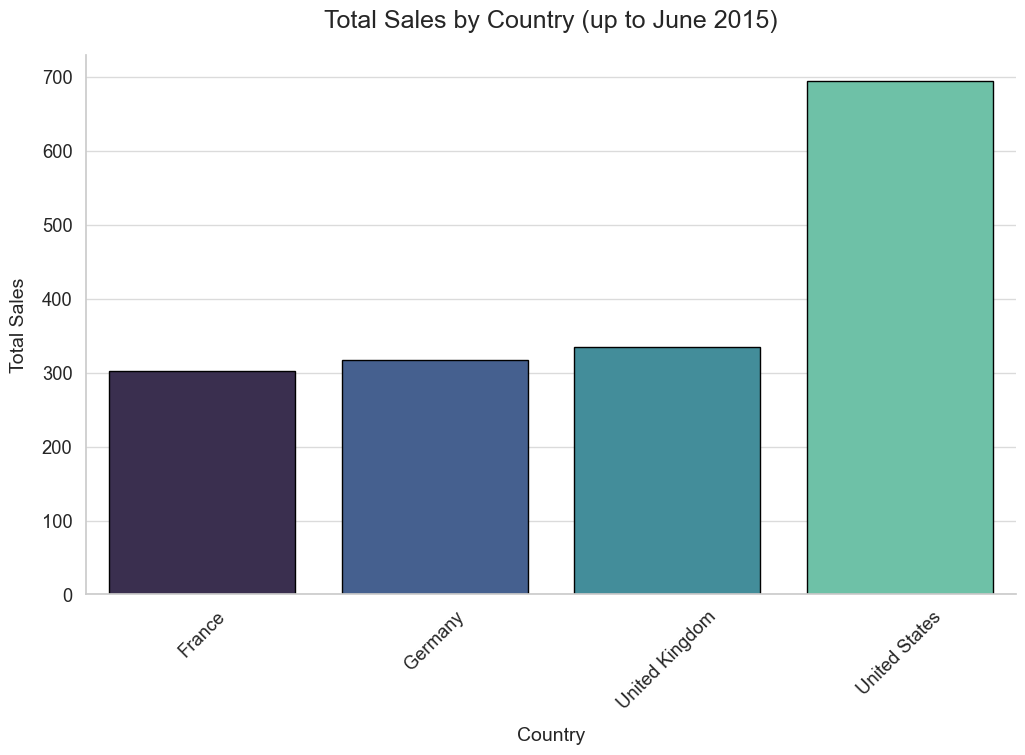

In [27]:
# Filter the data up until June 2015
df_period = df[df['Date'] <= '2015-06']

# Calculate the total sales for each country
total_sales_by_country = df_period.groupby('Country')['Quantity'].sum().reset_index()
total_sales_by_country.rename(columns={'Quantity': 'Total Sales'}, inplace=True)

# Sort the data by total sales in descending order
total_sales_by_country.sort_values('Total Sales', ascending=False, inplace=True)

# Create a larger figure
plt.figure(figsize=(12, 7))

# Plot the total sales for each country using a custom color palette
sns.barplot(x='Country', y='Total Sales', data=total_sales_by_country, palette="mako", edgecolor='black', linewidth=1)

# Set grid layout
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Customize the title and axis labels
plt.title('Total Sales by Country (up to June 2015)', fontsize=18, pad=20)
plt.xlabel('Country', fontsize=14, labelpad=10)
plt.ylabel('Total Sales', fontsize=14, labelpad=10)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<a name="section6-3"></a>
### Prices 33% Higher!

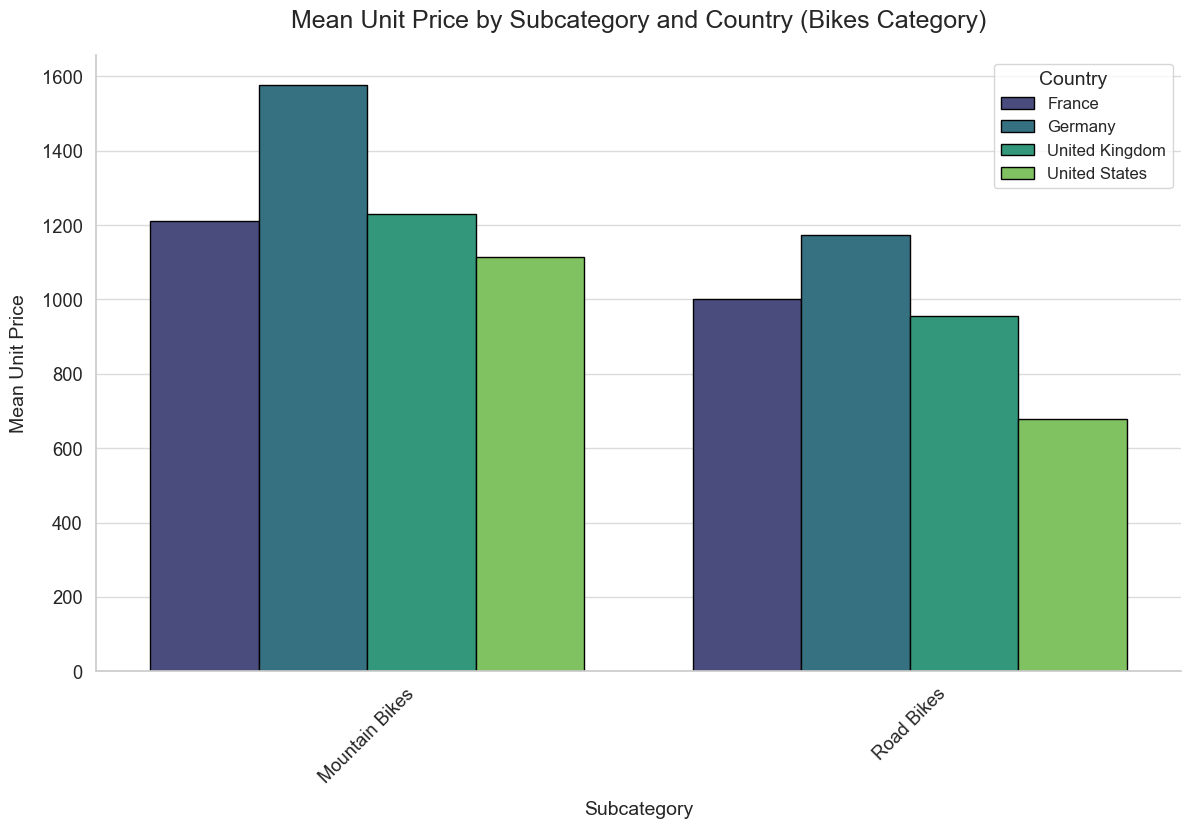

In [26]:
# Filter the data up until June 2015 for the Bikes category
df_period = df[(df['Date'] <= '2015-06') & (df['Product Category'] == 'Bikes')]

# Get the list of subcategories in the Bikes category
bike_subcategories = df_period[df_period['Product Category'] == 'Bikes']['Sub Category'].unique()

# Filter the data to only include subcategories in the Bikes category
df_period = df_period[df_period['Sub Category'].isin(bike_subcategories)]

# Remove trailing whitespaces and special characters from state names
df_period['Sub Category'] = df_period['Sub Category'].str.strip()

# Group the data by country and subcategory, and calculate the mean of the Unit Price column
mean_unit_price_by_country = df_period.groupby(['Country', 'Sub Category'])['Unit Price'].mean().reset_index()

# Sort the data by country and mean unit price in descending order
mean_unit_price_by_country.sort_values(['Country', 'Unit Price'], ascending=False, inplace=True)

# Create a larger figure
plt.figure(figsize=(14, 8))

# Plot the mean unit price for each subcategory for each country using a custom color palette
sns.barplot(x='Sub Category', y='Unit Price', hue='Country', data=mean_unit_price_by_country, palette="viridis", edgecolor='black', linewidth=1, zorder=2)

# Set grid layout
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=0)

# Customize the title and axis labels
plt.title('Mean Unit Price by Subcategory and Country (Bikes Category)', fontsize=18, pad=20)
plt.xlabel('Subcategory', fontsize=14, labelpad=10)
plt.ylabel('Mean Unit Price', fontsize=14, labelpad=10)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add a title for the legend
legend = plt.legend(title='Country', title_fontsize=14, fontsize=12)
legend.get_title().set_position((-10, 0))

# Show the plot
plt.show()

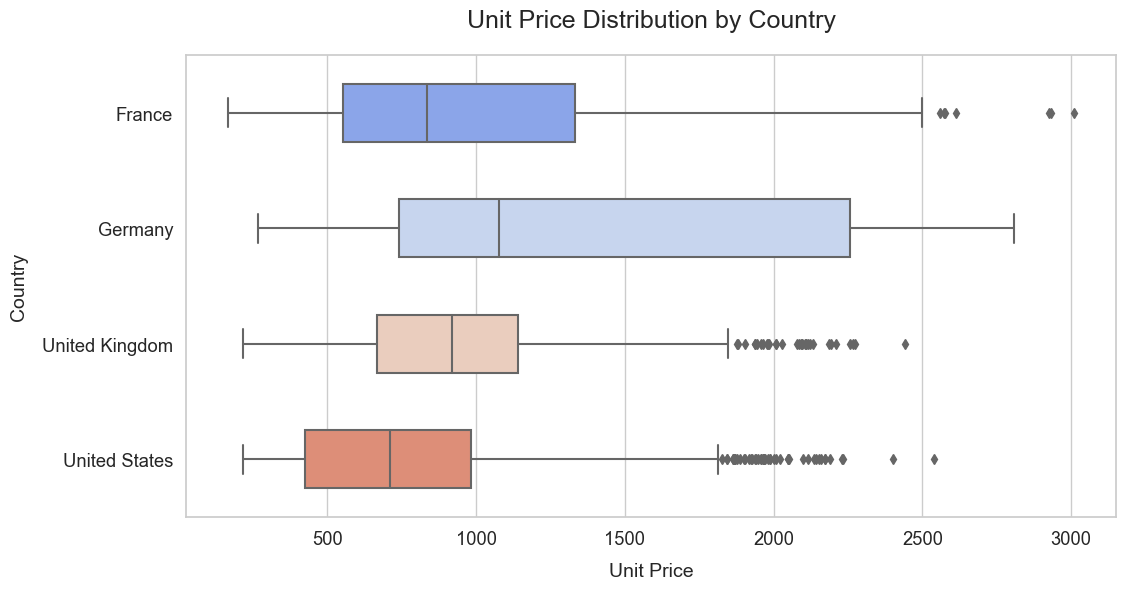

In [55]:
# Set a style for the plot
sns.set_style('whitegrid')

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the boxplot with custom color and display the median value
box_plot = sns.boxplot(y='Country', x='Unit Price', data=df_period, palette='coolwarm', width=0.5)

# Customize the title, axis labels, and font sizes
plt.title('Unit Price Distribution by Country', fontsize=18, pad=20)
plt.xlabel('Unit Price', fontsize=14, labelpad=10)
plt.ylabel('Country', fontsize=14, labelpad=10)

# Annotate the medians on the plot
for patch in box_plot.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.5))
    x, y, width, height = patch.get_bbox().bounds
    median_value = df_period[df_period['Country'] == patch.get_ydata()[0]]['Unit Price'].median()
    box_plot.annotate(f'Median: {median_value:.2f}', (x + width, y + height / 2), fontsize=12, ha='left', va='center')

# Show the plot
plt.show()

<a name="section6-3-1"></a>
#### Top-Performing German States

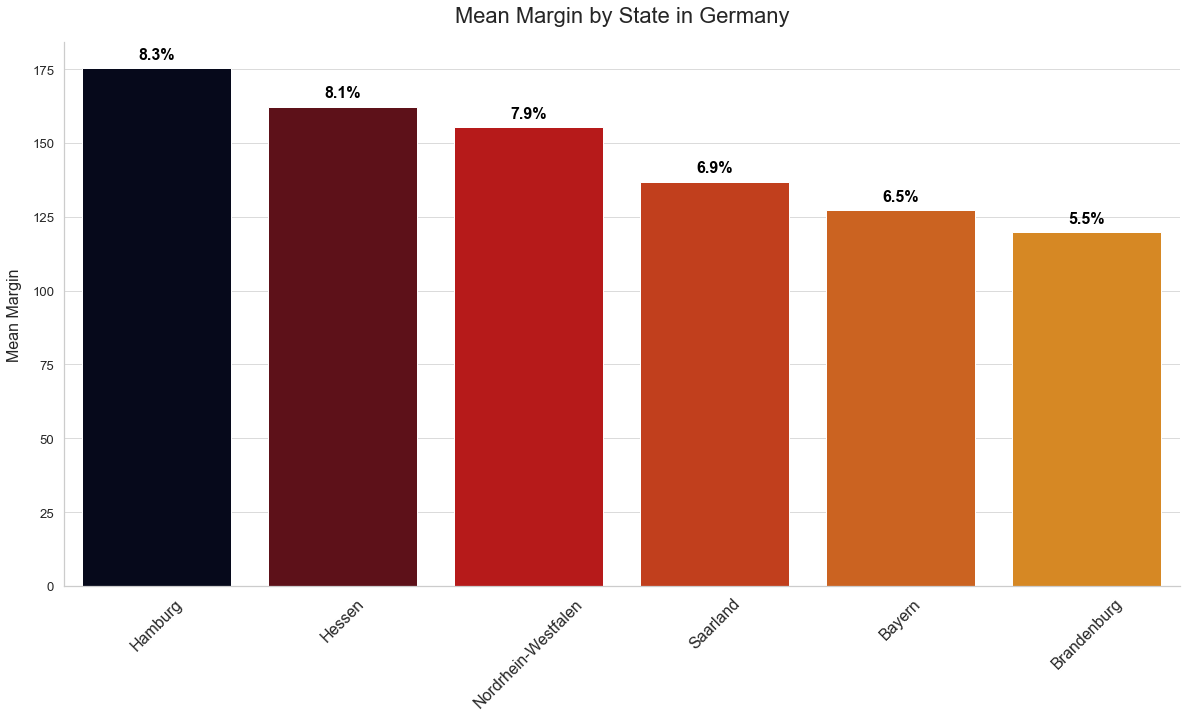

In [58]:
# Plot the mean margin for each state in Germany
plt.figure(figsize=(20, 10))
bar_plot = sns.barplot(x=mean_margin_by_state.index, y=mean_margin_by_state.values, palette=custom_palette)

# Set grid layout
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Customize the title and axis labels
plt.title('Mean Margin by State in Germany', fontsize=22, pad=20)
plt.xlabel('', fontsize=16, labelpad=10)
plt.ylabel('Mean Margin', fontsize=16, labelpad=10)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, fontsize=16)

# Add annotations above each bar with margin percentage of revenue
for i, p in enumerate(bar_plot.patches):
    state = p.get_x() + p.get_width() / 2
    margin_pct = total_revenue_margin_by_state_germany.loc[mean_margin_by_state.index[i], 'Margin %']
    bar_plot.annotate(f"{margin_pct:.1f}%",
                      (state, p.get_height() + 0.5),
                      ha="center",
                      va="bottom",
                      fontsize=16,
                      fontweight="bold",
                      color="black",
                      xytext=(0, 5),
                      textcoords="offset points")

# Show the plot
plt.show()


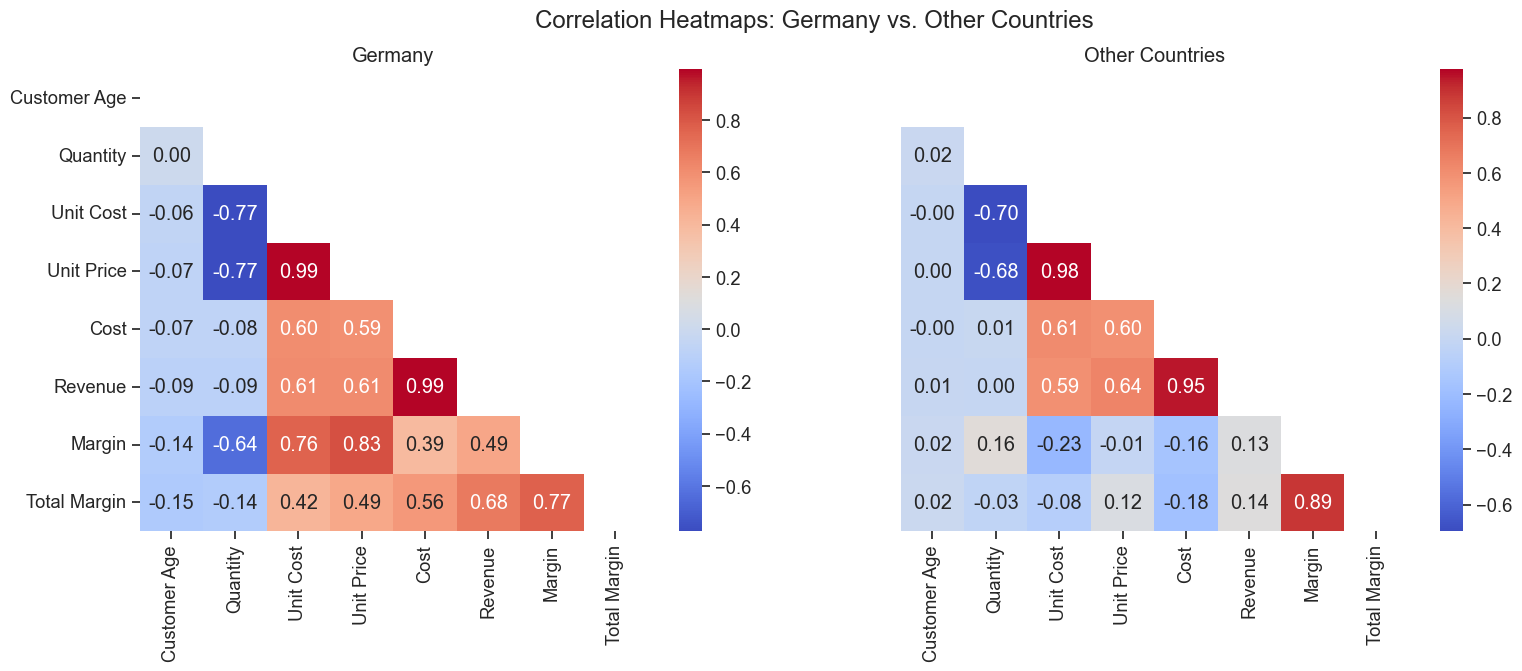

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the data for Germany and other countries
germany_df = df_period[df_period['Country'] == 'Germany'].copy()
other_countries_df = df_period[df_period['Country'] != 'Germany'].copy()

germany_df.drop('Year', axis=1, inplace=True)
other_countries_df.drop('Year', axis=1, inplace=True)

# Calculate the correlation matrices for each group
germany_correlation_matrix = germany_df.corr()
other_countries_correlation_matrix = other_countries_df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(germany_correlation_matrix, dtype=bool))

# Set up the subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
fig.suptitle("Correlation Heatmaps: Germany vs. Other Countries")

# Plot the heatmap for Germany with mask
sns.heatmap(germany_correlation_matrix, annot=True, cmap="coolwarm", mask=mask, ax=ax1, fmt=".2f")
ax1.set_title("Germany")

# Plot the heatmap for other countries with mask
sns.heatmap(other_countries_correlation_matrix, annot=True, cmap="coolwarm", mask=mask, ax=ax2, fmt=".2f")
ax2.set_title("Other Countries")
ax2.yaxis.set_ticks_position('none')

plt.show()


<a name="section7"></a>
# Correlation Matrix Analysis
- **Unit Cost and Margin**:
  - Germany shows a strong positive correlation
  - High-quality products result in greater satisfaction
  - Perceived value consideration
- **Quantity and Margin**:
  - Germany displays a strong negative correlation
  - Potential quantity discounts provided
- **Quantity and Unit Cost/Unit Price**:
    - Bulk orders purchased at lower prices
    - Reduced margins on bulk orders in Germany suggest marketing campaigns
- **Customer Age**:
  - Exhibits weak correlation with other variables
  - Customer age may not have a significant impact on sales and profitability
  - In-depth analysis needed to examine demographics, preferences, and economic factors

<a name="section8"></a>
# Insights #2: How Germany Achieved Profits in Bike Sales

- The answer to this question appears straightforward: Germany charged higher prices.   
- However, this finding prompts further inquiry. What factors enabled Germany to charge more?

<br>
<hr style="border:1px solid brown"> </hr>

<a name="section9"></a>
# Factors Behind Germany's Success

<a name="section9-1"></a>
## Finding the Ideal Target Audience
- Examining the differences in margins among various target audience segments

<div style="float: left;">
    <a href="https://freeimage.host/i/HXLx3aR">
        <img src="https://iili.io/HXLx3aR.md.jpg" alt="HXLx3aR.md.jpg" border="0">
    </a>
</div>


<a name="section9-1-1"></a>
### Age distribution
- Analyzing the customer age distribution in Germany compared to other countries

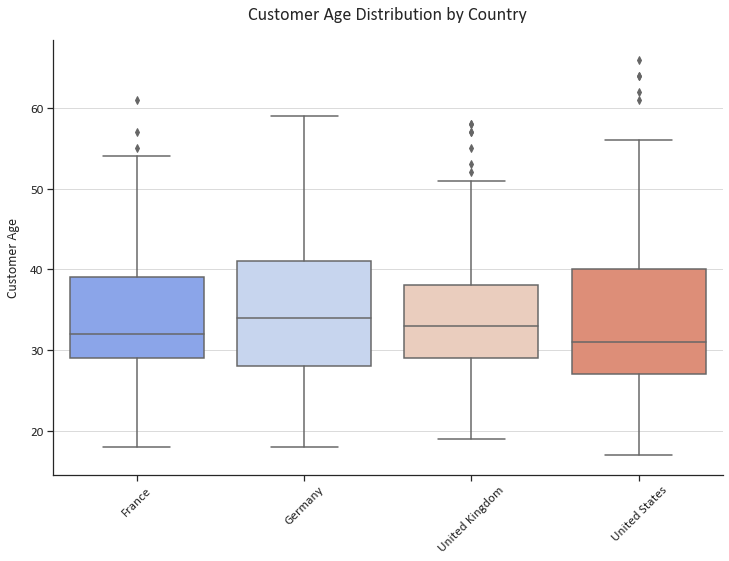

In [16]:
# Filter the data up until June 2015
df_period = df[df['Date'] <= '2015-06']

# Create a larger figure
plt.figure(figsize=(12, 8))

# Use a custom color palette
palette = sns.color_palette("coolwarm", len(df_period['Country'].unique()))

# Plot the Customer Age distribution by Country using a boxplot with custom color palette
sns.boxplot(x='Country', y='Customer Age', data=df_period, palette=palette)

# Set grid layout
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Customize the title and axis labels
plt.title('Customer Age Distribution by Country', fontsize=18, pad=20)
plt.xlabel('', fontsize=14, labelpad=10)
plt.ylabel('Customer Age', fontsize=14, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


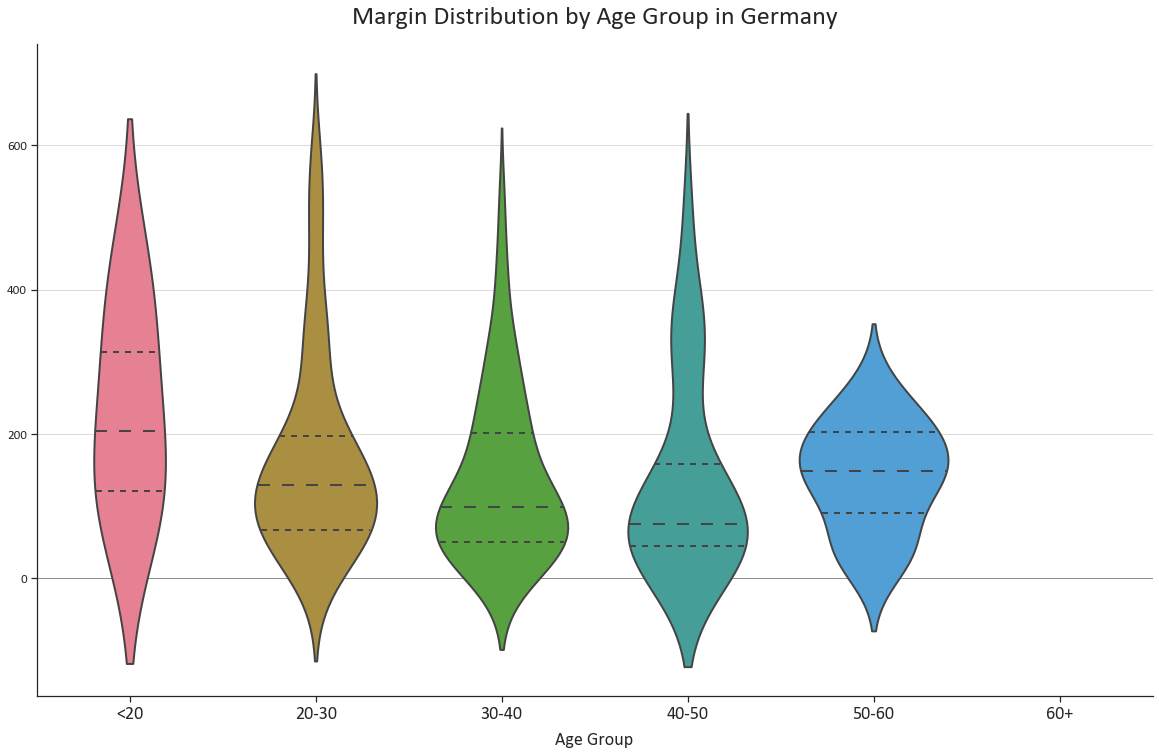

In [23]:
# Create age categories
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# Filter the data up until June 2015 and for Germany
germany_df = df[(df['Date'] <= '2015-06') & (df["Country"] == "Germany")]

# Create a larger figure
plt.figure(figsize=(20, 12))

# Plot the Margin distribution by Age Group using a violin plot with custom color palette
sns.violinplot(x='Age Group', y='Margin', data=germany_df, palette='husl', inner="quartile", linewidth=2)

# Set grid layout
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add grid line at 0
plt.axhline(0, color='black', linestyle='-', linewidth=1, zorder=0)

# Customize the title and axis labels
plt.title('Margin Distribution by Age Group in Germany', fontsize=26, pad=20)
plt.xlabel('Age Group', fontsize=18, labelpad=10)
plt.ylabel('', fontsize=18, labelpad=10)
plt.xticks(fontsize=18)

# Show the plot
plt.show()

**Germany**
- Violin plot displays dynamic pricing strategies for different age groups
- Higher prices for customers under 20 years old
- Possible reasons:
    - Capitalizing on parents paying for children's purchases
    - Younger customers buying used or refurbished bikes with higher margins
- Slightly higher margins for senior customers

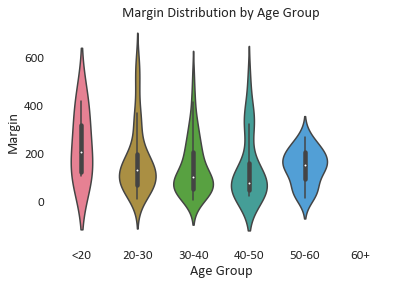

In [9]:
# Create age categories
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# Filter the data up until June 2015 and for Germany
germany_df = df[(df['Date'] <= '2015-06') & (df["Country"] == "Germany")]

# Plot the Margin distribution by Age Group using a violin plot
sns.violinplot(x='Age Group', y='Margin', data=germany_df, palette='husl')
sns.despine(left=True, bottom=True)
plt.gca().yaxis.set_ticks_position('none')
plt.gca().xaxis.set_ticks_position('none')
plt.title('Margin Distribution by Age Group')
plt.show()

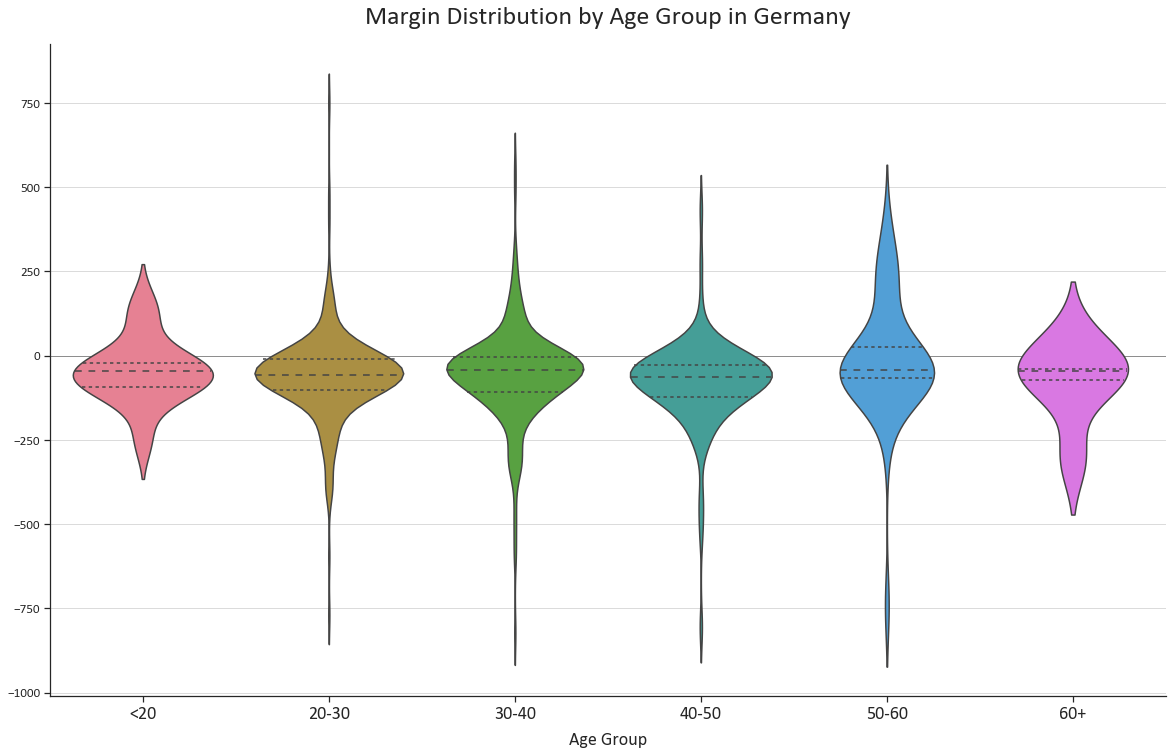

In [22]:
# Create age categories
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# Filter the data up until June 2015 and for Germany
germany_df = df[(df['Date'] <= '2015-06') & (df["Country"] != "Germany")]

# Create a larger figure
plt.figure(figsize=(20, 12))

# Plot the Margin distribution by Age Group using a violin plot with custom color palette
sns.violinplot(x='Age Group', y='Margin', data=germany_df, palette='husl', inner="quartile", linewidth=1.5)

# Set grid layout
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Add grid line at 0
plt.axhline(0, color='black', linestyle='-', linewidth=1, zorder=0)

# Customize the title and axis labels
plt.title('Margin Distribution by Age Group in Germany', fontsize=26, pad=20)
plt.xlabel('Age Group', fontsize=18, labelpad=10)
plt.ylabel('', fontsize=18, labelpad=10)
plt.xticks(fontsize=18)

# Show the plot
plt.show()

**Other Countries**
- Rigid pricing strategies
- Lack of flexibility in adapting to different customer segments

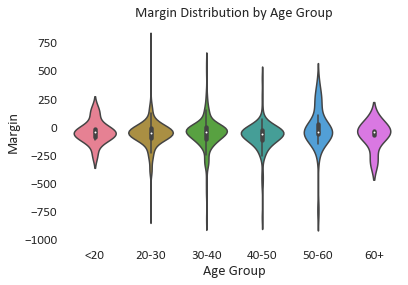

In [10]:
# Create age categories
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

# Filter the data up until June 2015
others_df = df[(df['Date'] <= '2015-06') & (df["Country"] != "Germany")]

# Plot the Margin distribution by Age Group using a violin plot
sns.violinplot(x='Age Group', y='Margin', data=others_df, palette='husl')
sns.despine(left=True, bottom=True)
plt.gca().yaxis.set_ticks_position('none')
plt.gca().xaxis.set_ticks_position('none')
plt.title('Margin Distribution by Age Group')
plt.show()

<a name="section9-1-2"></a>
### Gender distribution
- Proportion of male and female customers in Germany and other countries.

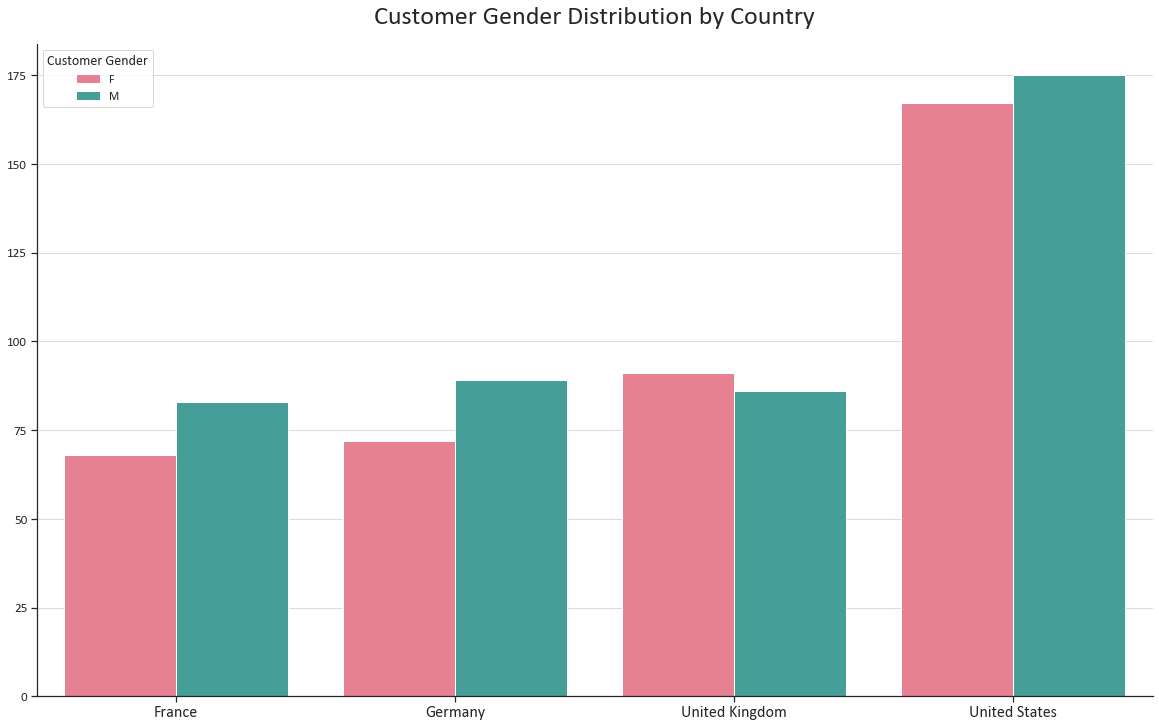

In [21]:
# Create a larger figure
plt.figure(figsize=(20, 12))

# Use a custom color palette
palette = sns.color_palette("husl", 2)

# Plot the count of Customer Gender by Country using a countplot with custom color palette
sns.countplot(x='Country', hue='Customer Gender', data=df_period, palette=palette)

# Set grid layout
sns.despine()
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Customize the title and axis labels
plt.title('Customer Gender Distribution by Country', fontsize=26, pad=20)
plt.xlabel('', fontsize=14, labelpad=10)
plt.ylabel('', fontsize=14, labelpad=10)
plt.xticks(fontsize=16)

# Customize the legend
legend = plt.legend(title='Customer Gender', fontsize=12, loc='upper left')
legend.get_title().set_fontsize(14)

# Show the plot
plt.show()


<a name="section9-1-3"></a>
### Bike type preferences
- Most popular bike types in Germany and other countries.

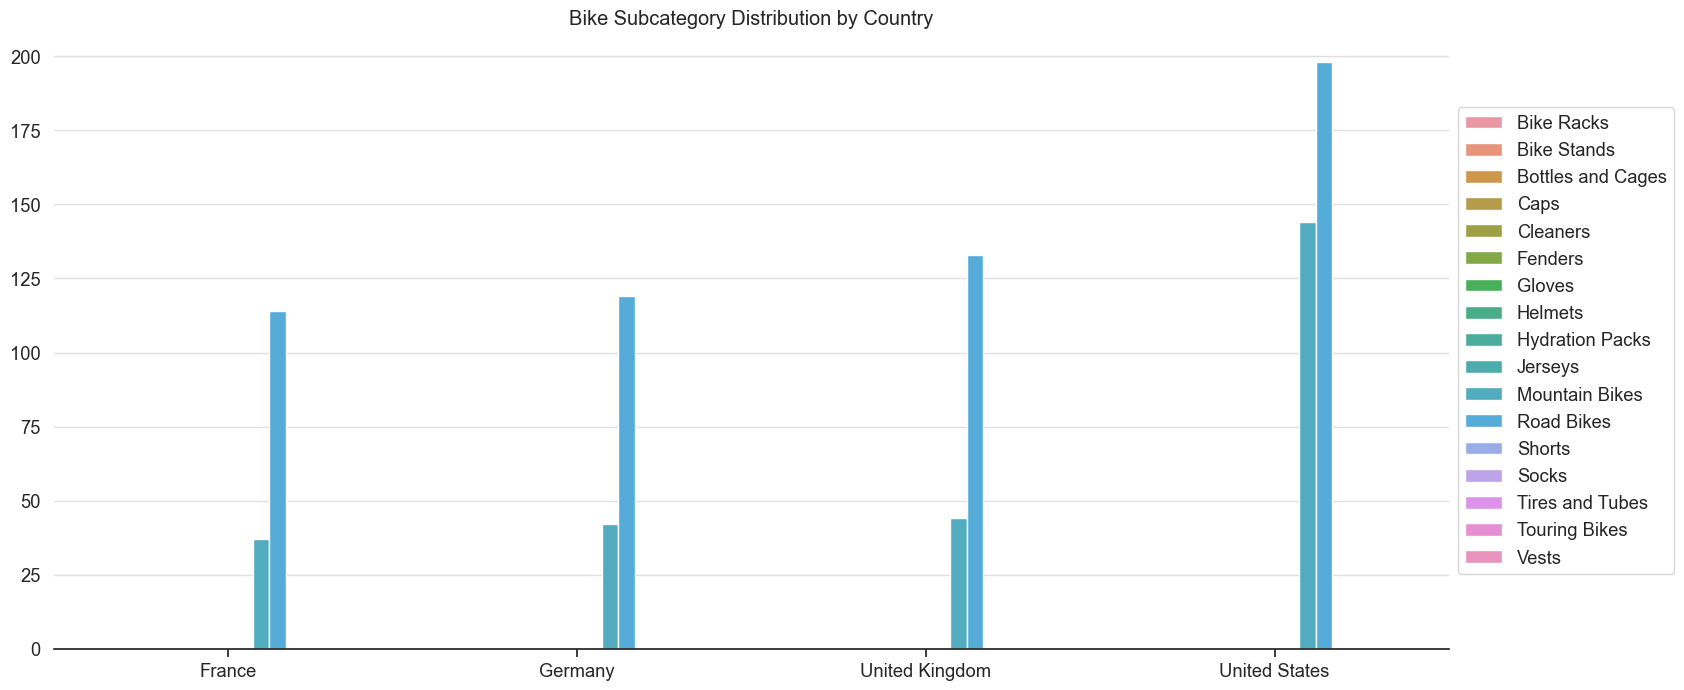

In [15]:
# Before new product line
# Filter the dataset to only include rows with 'Product Category' set to 'Bikes'
bikes_df = df_period[df_period['Product Category'] == 'Bikes']

# Create a bar plot comparing the count of different subcategories in Germany and other countries
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='Country', hue='Sub Category', data=bikes_df)
plt.title("Bike Subcategory Distribution by Country")

# Set grid layout
sns.despine(left=True) # remove spines
plt.gca().yaxis.set_ticks_position('none') # remove y-ticks (w/o ax)
# ax.yaxis.set_ticks_position('none') # remove y-tick (w/ ax)
plt.grid(axis='y', linestyle='-', alpha=0.7, color="lightgray") # add gridlines

plt.ylabel("")
plt.xlabel("")

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

<a name="section9-1-4"></a>
### Struggles During Off-Season

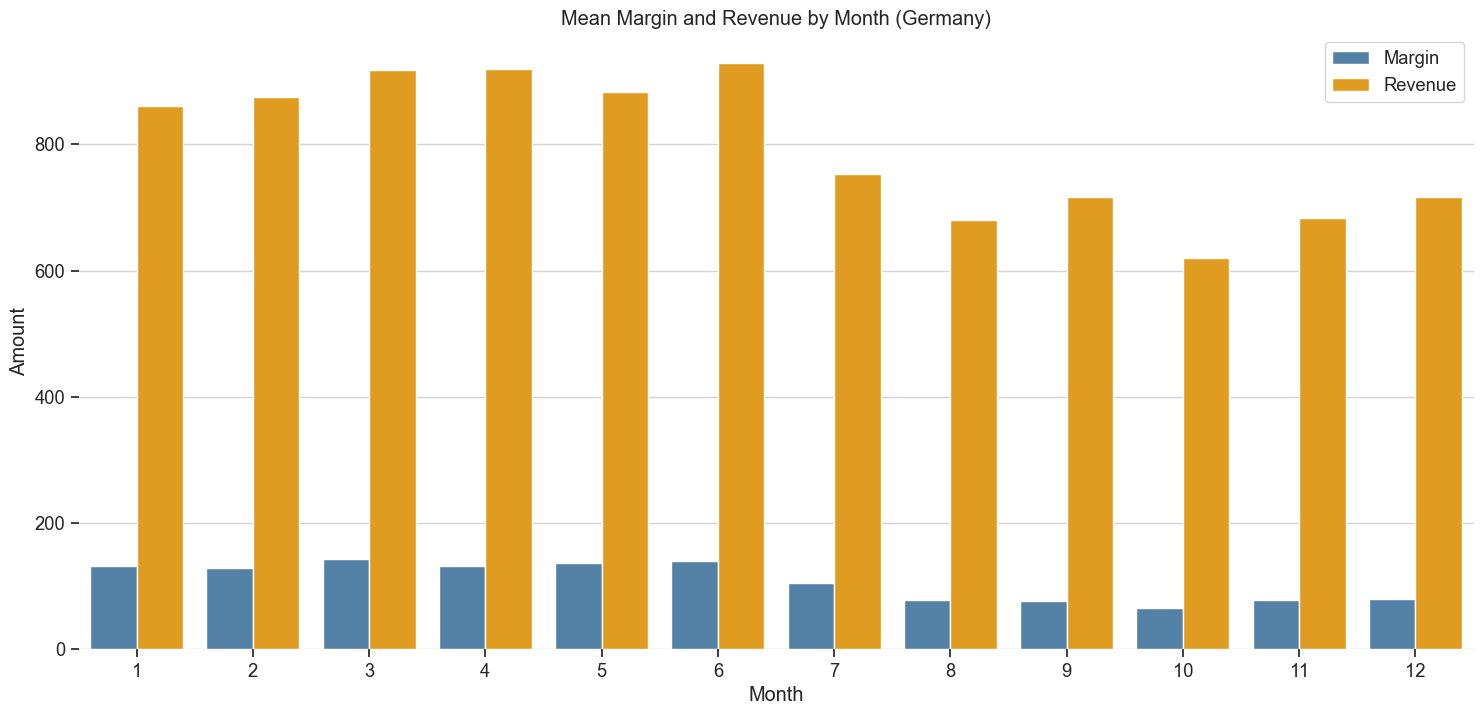

In [7]:
# All years
# Filter the data for only Germany
germany_df_all = df[df["Country"] == "Germany"].copy()
# Convert the 'Date' column to datetime format
germany_df_all.loc[:,'Date'] = pd.to_datetime(germany_df_all['Date'])
# Extract the month from the 'Date' column and create a new column 'Month'
germany_df_all.loc[:,'Month'] = germany_df_all['Date'].dt.month

# Group the data by month and calculate the mean of the Margin and Revenue columns
mean_margin_revenue_by_month_germany = germany_df_all.groupby('Month')[['Margin', 'Revenue']].mean()

# Sort the data by month
mean_margin_revenue_by_month_germany.sort_index(ascending=True, inplace=True)

# Set style
sns.set(style="ticks", font="Arial", font_scale=1.2, rc={"grid.linestyle": "-", "axes.grid": False})

# Reset index to use 'Month' as a column
mean_margin_revenue_by_month_germany.reset_index(inplace=True)

# Melt the data frame to have a single 'Value' column for both Margin and Revenue
melted_data_germany = pd.melt(mean_margin_revenue_by_month_germany, id_vars=['Month'], value_vars=['Margin', 'Revenue'], var_name='Type', value_name='Amount')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(18, 8))

# Create a barplot of the mean Margin and Revenue by Month
sns.barplot(x='Month', y='Amount', hue='Type', data=melted_data_germany, palette=['steelblue', 'orange'], ax=ax)

# Set the y-axis label
ax.set_ylabel('Amount')

# Add legend
ax.legend()

# Add title
ax.set_title('Mean Margin and Revenue by Month (Germany)')

# Set grid layout
sns.despine(left=True, bottom=True)
ax.grid(axis='y', color='lightgray')

# Show the plot
plt.show()


**Greater Challenges in Other Countries**

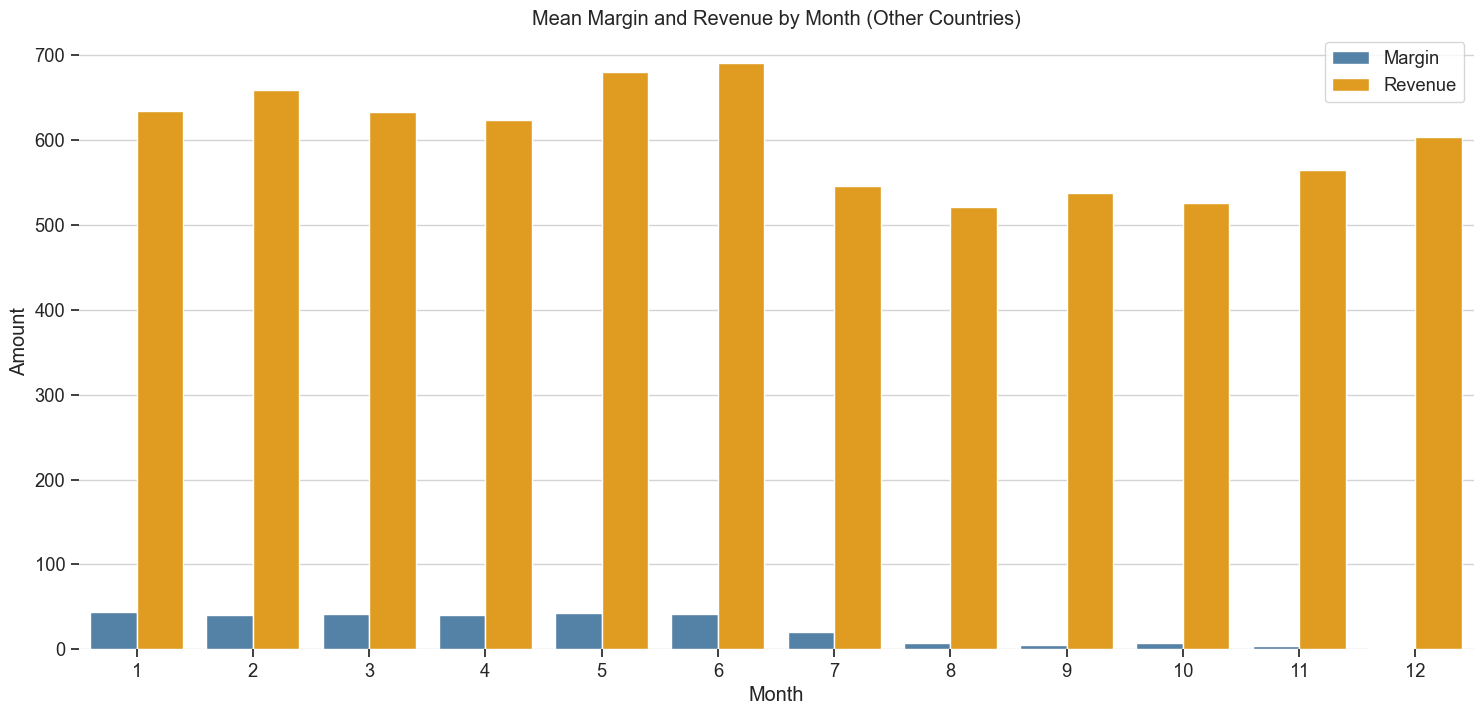

In [5]:
# All years
# Filter the data for only Germany
others_df_all = df[df["Country"] != "Germany"].copy()
# Convert the 'Date' column to datetime format
others_df_all.loc[:,'Date'] = pd.to_datetime(others_df_all['Date'])
# Extract the month from the 'Date' column and create a new column 'Month'
others_df_all.loc[:,'Month'] = others_df_all['Date'].dt.month

# Group the data by month and calculate the mean of the Margin and Revenue columns
mean_margin_revenue_by_month_germany = others_df_all.groupby('Month')[['Margin', 'Revenue']].mean()

# Sort the data by month
mean_margin_revenue_by_month_germany.sort_index(ascending=True, inplace=True)

# Set style
sns.set(style="ticks", font="Arial", font_scale=1.2, rc={"grid.linestyle": "-", "axes.grid": False})

# Reset index to use 'Month' as a column
mean_margin_revenue_by_month_germany.reset_index(inplace=True)

# Melt the data frame to have a single 'Value' column for both Margin and Revenue
melted_data_germany = pd.melt(mean_margin_revenue_by_month_germany, id_vars=['Month'], value_vars=['Margin', 'Revenue'], var_name='Type', value_name='Amount')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(18, 8))

# Create a barplot of the mean Margin and Revenue by Month
sns.barplot(x='Month', y='Amount', hue='Type', data=melted_data_germany, palette=['steelblue', 'orange'], ax=ax)

# Set the y-axis label
ax.set_ylabel('Amount')

# Add legend
ax.legend()

# Add title
ax.set_title('Mean Margin and Revenue by Month (Other Countries)')

# Set grid layout
sns.despine(left=True, bottom=True)
ax.grid(axis='y', color='lightgray')

# Show the plot
plt.show()

<a name="section10"></a>
# Final Insights: Factors behind Germanys Success

- Adapting dynamic pricing strategies for different target audiences
- Implementing targeted campaigns, ordering higher quantities in bulk at lower unit costs
- Consistent performance across all seasons, maintaining results throughout the year

<br>
<hr style="border:1px solid brown"> </hr>

<a name="section11"></a>
# Conclusion

Thank you for your attention!

**Key Takeaways:**
- Identified opportunities for enhancing growth within the business
- Examined top-performing entities and understood the factors driving their success
- Applied insights gained to minimize risk while increasing profits

**Questions?**

Feel free to ask any questions or provide feedback.

<div style="text-align: left;">
<a href="https://freeimage.host/i/HXsIQUv"><img src="https://iili.io/HXsIQUv.md.jpg" alt="HXsIQUv.md.jpg" border="0" width="450"></a>
</div>




<img src="https://iili.io/HXPWyVj.md.png" alt="Your image description" />

<br>
<hr style="border:4px solid brown"> </hr>